# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame as df


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

c0d65ffb1787ae42f951ba117005996e


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#api_key = "weather_api_key.api_key"


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996eappid=c0d65ffb1787ae42f951ba117005996e&units=metric&q='

In [5]:
# Create empty lists to append the API data into lists 

#OpenWeatherMap API Key
#api_key = weather_api_key
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
city_name = []
temps = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
country = []
date = []
lng = []
max_temp = []

#create query url
#for city in cities:
    #data = requests.get(url).json()
    #query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    #print(query)
    #response = requests.get(query).json()
    
# Start the call counter 
#record = 1





In [6]:
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    print(query)
    response = requests.get(query).json()
    print(response)
    try: 
        query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
        print(query)
        response = requests.get(query).json()
        print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
    #city_record = response["name"]
    #print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        print(city_name)
        # Increase counter by one 
        #record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        #time.sleep(1.01)
        # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
       
    continue


Beginning Data Retrieval
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rikitea
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 79.47, 'feels_like': 80.11, 'temp_min': 79.47, 'temp_max': 79.47, 'pressure': 1016, 'humidity': 79, 'sea_level': 1016, 'grnd_level': 1016}, 'wind': {'speed': 14.61, 'deg': 109}, 'clouds': {'all': 75}, 'dt': 1580609232, 'sys': {'country': 'PF', 'sunrise': 1580567957, 'sunset': 1580615248}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rikitea
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 79.47, 'feels_like': 80.11, '

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': -24.86, 'feels_like': -35.1, 'temp_min': -24.86, 'temp_max': -24.86, 'pressure': 1007, 'humidity': 76, 'sea_level': 1007, 'grnd_level': 965}, 'wind': {'speed': 5.75, 'deg': 57}, 'clouds': {'all': 40}, 'dt': 1580609234, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=qaanaaq
{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': -24.86, 'feels_like': -35.1, 'temp_min': -24.86, 'temp_max': -24.86, 'pressure': 1007, 'humidity': 76, 'sea_level': 1007, 'grnd_level': 965}, 'wind': {'speed': 5.75, 'deg': 57}, 'clouds': {'all': 40}, 'dt': 158060

{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.01, 'feels_like': 74.71, 'temp_min': 78.01, 'temp_max': 78.01, 'pressure': 1015, 'humidity': 31}, 'wind': {'speed': 3.74, 'deg': 77}, 'clouds': {'all': 0}, 'dt': 1580609235, 'sys': {'type': 3, 'id': 2011706, 'country': 'AU', 'sunrise': 1580593248, 'sunset': 1580642618}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=busselton
{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.01, 'feels_like': 74.71, 'temp_min': 78.01, 'temp_max': 78.01, 'pressure': 1015, 'humidity': 31}, 'wind': {'speed': 3.74, 'deg': 77}, 'clouds': {'all': 0}, 'dt': 1580609235, 'sys': {'type': 3, 'id': 2011706, 'coun

{'coord': {'lon': -50.21, 'lat': -30.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 75.4, 'feels_like': 71.17, 'temp_min': 75.4, 'temp_max': 75.4, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 1015}, 'wind': {'speed': 19.66, 'deg': 49}, 'rain': {'3h': 0.13}, 'clouds': {'all': 88}, 'dt': 1580609015, 'sys': {'country': 'BR', 'sunrise': 1580546921, 'sunset': 1580595594}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=cidreira
{'coord': {'lon': -50.21, 'lat': -30.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 75.4, 'feels_like': 71.17, 'temp_min': 75.4, 'temp_max': 75.4, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 1015}, 'wind': {'speed': 19.66, 'deg': 49}, 'rain': {'3h': 

{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.06, 'feels_like': 57.36, 'temp_min': 55, 'temp_max': 60.01, 'pressure': 1028, 'humidity': 93}, 'visibility': 500, 'wind': {'speed': 2.24, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1580609237, 'sys': {'type': 1, 'id': 6896, 'country': 'PT', 'sunrise': 1580629312, 'sunset': 1580665917}, 'timezone': 0, 'id': 2738381, 'name': 'Lata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lata
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.06, 'feels_like': 57.36, 'temp_min': 55, 'temp_max': 60.01, 'pressure': 1028, 'humidity': 93}, 'visibility': 500, 'wind': {'speed': 2.24, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1580609237, 'sys': {'type': 1, 'id': 6896, 'country'

{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.56, 'feels_like': 66, 'temp_min': 64, 'temp_max': 71.6, 'pressure': 1017, 'humidity': 68}, 'visibility': 14484, 'wind': {'speed': 8.79, 'deg': 107}, 'clouds': {'all': 90}, 'dt': 1580609238, 'sys': {'type': 1, 'id': 7151, 'country': 'MX', 'sunrise': 1580565558, 'sunset': 1580605617}, 'timezone': -25200, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=cabo san lucas
{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.56, 'feels_like': 66, 'temp_min': 64, 'temp_max': 71.6, 'pressure': 1017, 'humidity': 68}, 'visibility': 14484, 'wind': {'speed': 8.79, 'deg': 107}, 'clouds': {'all': 90}, 'dt

{'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 23.07, 'feels_like': 5.31, 'temp_min': 23.07, 'temp_max': 23.07, 'pressure': 980, 'humidity': 79, 'sea_level': 980, 'grnd_level': 979}, 'wind': {'speed': 22.28, 'deg': 174}, 'clouds': {'all': 100}, 'dt': 1580609239, 'sys': {'country': 'NO', 'sunrise': 1580630598, 'sunset': 1580646667}, 'timezone': 3600, 'id': 780687, 'name': 'Berlevag', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=berlevag
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo

{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.89, 'feels_like': 73.81, 'temp_min': 71.01, 'temp_max': 75.99, 'pressure': 1017, 'humidity': 69}, 'visibility': 2816, 'wind': {'speed': 8.05, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1580609241, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1580576132, 'sunset': 1580616731}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=hilo
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura

{'coord': {'lon': 22.64, 'lat': 32.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 60.49, 'feels_like': 53.85, 'temp_min': 60.49, 'temp_max': 60.49, 'pressure': 1021, 'humidity': 80, 'sea_level': 1021, 'grnd_level': 1021}, 'wind': {'speed': 14.14, 'deg': 288}, 'clouds': {'all': 39}, 'dt': 1580609242, 'sys': {'country': 'LY', 'sunrise': 1580621050, 'sunset': 1580659312}, 'timezone': 7200, 'id': 87205, 'name': 'Darnah', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=darnah
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo 

{'coord': {'lon': 102.5, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -22.61, 'feels_like': -37.41, 'temp_min': -22.61, 'temp_max': -22.61, 'pressure': 1036, 'humidity': 93, 'sea_level': 1036, 'grnd_level': 1032}, 'wind': {'speed': 13.96, 'deg': 230}, 'clouds': {'all': 100}, 'dt': 1580609243, 'sys': {'country': 'RU', 'sunrise': 1580614596, 'sunset': 1580627429}, 'timezone': 25200, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=khatanga
{'coord': {'lon': 102.5, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -22.61, 'feels_like': -37.41, 'temp_min': -22.61, 'temp_max': -22.61, 'pressure': 1036, 'humidity': 93, 'sea_level': 1036, 'grnd_level': 1032}, 'wind': {'speed': 13.96, 'deg': 230}, 'clouds': {

{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57, 'feels_like': 54.7, 'temp_min': 57, 'temp_max': 57, 'pressure': 1004, 'humidity': 94}, 'wind': {'speed': 7, 'deg': 228, 'gust': 14}, 'rain': {'3h': 1.13}, 'clouds': {'all': 100}, 'dt': 1580609244, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1580578733, 'sunset': 1580631690}, 'timezone': 46800, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=bluff
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', '

{'coord': {'lon': -51.73, 'lat': -19.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 72.27, 'feels_like': 76.66, 'temp_min': 72.27, 'temp_max': 72.27, 'pressure': 1014, 'humidity': 82, 'sea_level': 1014, 'grnd_level': 958}, 'wind': {'speed': 2.73, 'deg': 191}, 'clouds': {'all': 100}, 'dt': 1580609245, 'sys': {'country': 'BR', 'sunrise': 1580548322, 'sunset': 1580594923}, 'timezone': -14400, 'id': 3466750, 'name': 'Cassilandia', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=cassilandia
{'coord': {'lon': -51.73, 'lat': -19.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 72.27, 'feels_like': 76.66, 'temp_min': 72.27, 'temp_max': 72.27, 'pressure': 1014, 'humidity': 82, 'sea_level': 1014, 'grnd_level': 958}, 'wind': {'speed': 2.73, 'deg': 191}, 'clouds': {'

{'coord': {'lon': 113.63, 'lat': -24.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 81.99, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1007, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1580609238, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1580594546, 'sunset': 1580642136}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=carnarvon
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura',

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sentyabrskiy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=vigrestad
{'coord': {'lon': 5.7, 'lat': 58.57}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 37.24, 'feels_like': 29.35, 'temp_min': 36, 'temp_max': 39.2, 'pressure': 994, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1580609246, 'sys': {'type': 1, 'id': 1680, 'country': 'NO', 'sunrise': 1580629380, 'sunset': 1580659114}, 'timezone': 3600, 'id': 3131824, 'name': 'Vigrestad', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=vigrestad
{'coord': {'lon': 5.7, 'l

{'coord': {'lon': 47.6, 'lat': -23.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 71.92, 'feels_like': 78.64, 'temp_min': 71.92, 'temp_max': 71.92, 'pressure': 1019, 'humidity': 95, 'sea_level': 1019, 'grnd_level': 1014}, 'wind': {'speed': 2.01, 'deg': 243}, 'rain': {'3h': 1.06}, 'clouds': {'all': 44}, 'dt': 1580609247, 'sys': {'country': 'MG', 'sunrise': 1580610540, 'sunset': 1580657840}, 'timezone': 10800, 'id': 1054329, 'name': 'Vangaindrano', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=vangaindrano
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', '

{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': -30.96, 'feels_like': -42.52, 'temp_min': -30.96, 'temp_max': -30.96, 'pressure': 1035, 'humidity': 94, 'sea_level': 1035, 'grnd_level': 1029}, 'wind': {'speed': 8.05, 'deg': 345}, 'clouds': {'all': 0}, 'dt': 1580609248, 'sys': {'country': 'RU', 'sunrise': 1580604624, 'sunset': 1580627382}, 'timezone': 32400, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=zhigansk
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cab

{'coord': {'lon': 125.72, 'lat': 42.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 18.41, 'feels_like': 11.01, 'temp_min': 18.41, 'temp_max': 18.41, 'pressure': 1030, 'humidity': 53, 'sea_level': 1030, 'grnd_level': 955}, 'wind': {'speed': 2.28, 'deg': 310}, 'clouds': {'all': 100}, 'dt': 1580609249, 'sys': {'country': 'CN', 'sunrise': 1580597432, 'sunset': 1580633447}, 'timezone': 28800, 'id': 2036033, 'name': 'Liuhe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=liuhe
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo 

{'coord': {'lon': -43.42, 'lat': -13.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 85.86, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1580609250, 'sys': {'type': 1, 'id': 8380, 'country': 'BR', 'sunrise': 1580546808, 'sunset': 1580592448}, 'timezone': -10800, 'id': 3469437, 'name': 'Bom Jesus da Lapa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=bom jesus da lapa
{'coord': {'lon': -43.42, 'lat': -13.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 85.86, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1580609250, 'sys': {'ty

{'coord': {'lon': 13.19, 'lat': 32.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 61.5, 'feels_like': 57.02, 'temp_min': 61.5, 'temp_max': 61.5, 'pressure': 1023, 'humidity': 73, 'sea_level': 1023, 'grnd_level': 1023}, 'wind': {'speed': 9.48, 'deg': 28}, 'clouds': {'all': 0}, 'dt': 1580609251, 'sys': {'country': 'LY', 'sunrise': 1580623328, 'sunset': 1580661570}, 'timezone': 7200, 'id': 2210247, 'name': 'Tripoli', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=tripoli
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas'

{'coord': {'lon': 54.09, 'lat': 17.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 65.77, 'temp_min': 68, 'temp_max': 68, 'pressure': 1016, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 360}, 'clouds': {'all': 8}, 'dt': 1580609092, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1580612103, 'sunset': 1580653161}, 'timezone': 14400, 'id': 286621, 'name': 'Salalah', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=salalah
{'coord': {'lon': 54.09, 'lat': 17.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 65.77, 'temp_min': 68, 'temp_max': 68, 'pressure': 1016, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 360}, 'clouds': {'all': 8}, 'dt': 1580609092, 'sys': {'type': 1, 'id': 

{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 54.9, 'feels_like': 49.12, 'temp_min': 54.9, 'temp_max': 54.9, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 985}, 'wind': {'speed': 10, 'deg': 232}, 'rain': {'3h': 0.75}, 'clouds': {'all': 100}, 'dt': 1580609252, 'sys': {'country': 'PT', 'sunrise': 1580633998, 'sunset': 1580671009}, 'timezone': -3600, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ribeira grande
{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 54.9, 'feels_like': 49.12, 'temp_min': 54.9, 'temp_max': 54.9, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 985}, 'wind': {'speed': 10, 'deg': 232}, 'rain': {'3h'

{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 87.39, 'feels_like': 93.51, 'temp_min': 87.39, 'temp_max': 87.39, 'pressure': 1012, 'humidity': 56, 'sea_level': 1012, 'grnd_level': 994}, 'wind': {'speed': 2.44, 'deg': 39}, 'clouds': {'all': 39}, 'dt': 1580609253, 'sys': {'country': 'ID', 'sunrise': 1580598979, 'sunset': 1580643157}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=bengkulu
{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 87.39, 'feels_like': 93.51, 'temp_min': 87.39, 'temp_max': 87.39, 'pressure': 1012, 'humidity': 56, 'sea_level': 1012, 'grnd_level': 994}, 'wind': {'speed': 2.44, 'deg': 39}, 'clouds': {'all': 39}, '

{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 30.16, 'feels_like': 21.51, 'temp_min': 30.16, 'temp_max': 30.16, 'pressure': 994, 'humidity': 83, 'sea_level': 994, 'grnd_level': 984}, 'wind': {'speed': 7.54, 'deg': 161}, 'clouds': {'all': 89}, 'dt': 1580609254, 'sys': {'country': 'IS', 'sunrise': 1580638806, 'sunset': 1580663806}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=olafsvik
{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 30.16, 'feels_like': 21.51, 'temp_min': 30.16, 'temp_max': 30.16, 'pressure': 994, 'humidity': 83, 'sea_level': 994, 'grnd_level': 984}, 'wind': {'speed': 7.54, 'deg': 161}, 'clouds': {'all': 89}, 'dt': 1

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=tura
{'coord': {'lon': 90.22, 'lat': 25.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 64.02, 'feels_like': 60.06, 'temp_min': 64.02, 'temp_max': 64.02, 'pressure': 1020, 'humidity': 41, 'sea_level': 1020, 'grnd_level': 1011}, 'wind': {'speed': 3.02, 'deg': 244}, 'clouds': {'all': 0}, 'dt': 1580609255, 'sys': {'country': 'IN', 'sunrise': 1580604146, 'sunset': 1580643774}, 'timezone': 19800, 'id': 1254046, 'name': 'Tura', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=tura
{'coord': {'lon': 90.22, 'lat': 25.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 64.02, 'feels_like': 60.06, 'temp_min': 64

{'coord': {'lon': -17.1, 'lat': 32.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 64.44, 'feels_like': 56.88, 'temp_min': 61, 'temp_max': 66.2, 'pressure': 1024, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1580609256, 'sys': {'type': 1, 'id': 6894, 'country': 'PT', 'sunrise': 1580630573, 'sunset': 1580668866}, 'timezone': 0, 'id': 2264557, 'name': 'Ponta do Sol', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ponta do sol
{'coord': {'lon': -17.1, 'lat': 32.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 64.44, 'feels_like': 56.88, 'temp_min': 61, 'temp_max': 66.2, 'pressure': 1024, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1580609256, 's

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sosnovo-ozerskoye
{'coord': {'lon': 111.54, 'lat': 52.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': -8.79, 'feels_like': -22.81, 'temp_min': -8.79, 'temp_max': -8.79, 'pressure': 1032, 'humidity': 82, 'sea_level': 1032, 'grnd_level': 907}, 'wind': {'speed': 12.97, 'deg': 273}, 'clouds': {'all': 31}, 'dt': 1580609257, 'sys': {'country': 'RU', 'sunrise': 1580602531, 'sunset': 1580635154}, 'timezone': 28800, 'id': 2016216, 'name': 'Sosnovo-Ozerskoye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sosnovo-ozerskoye
{'coord': {'lon': 111.54, 'lat': 52.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.01, 'feels_like': 72.59, 'temp_min': 78.01, 'temp_max': 78.01, 'pressure': 1011, 'humidity': 15}, 'wind': {'speed': 1.99, 'deg': 104, 'gust': 4}, 'clouds': {'all': 91}, 'dt': 1580609257, 'sys': {'type': 3, 'id': 2005652, 'country': 'EC', 'sunrise': 1580559029, 'sunset': 1580602756}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=puerto ayora
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', '

{'coord': {'lon': -81.93, 'lat': 34.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.78, 'feels_like': 37.29, 'temp_min': 36, 'temp_max': 46.4, 'pressure': 1012, 'humidity': 65}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 290}, 'rain': {'1h': 0.25}, 'clouds': {'all': 1}, 'dt': 1580609258, 'sys': {'type': 1, 'id': 5896, 'country': 'US', 'sunrise': 1580560007, 'sunset': 1580597735}, 'timezone': -18000, 'id': 4597200, 'name': 'Spartanburg', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=spartanburg
{'coord': {'lon': -81.93, 'lat': 34.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.78, 'feels_like': 37.29, 'temp_min': 36, 'temp_max': 46.4, 'pressure': 1012, 'humidity': 65}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 290}, 'rain': {'1h': 0.25},

{'coord': {'lon': 54.02, 'lat': 32.31}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 39.22, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1012, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 270}, 'clouds': {'all': 20}, 'dt': 1580609260, 'sys': {'type': 1, 'id': 7511, 'country': 'IR', 'sunrise': 1580613475, 'sunset': 1580651823}, 'timezone': 12600, 'id': 143073, 'name': 'Ardakan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ardakan
{'coord': {'lon': 54.02, 'lat': 32.31}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 39.22, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1012, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 270}, 'clouds': {'all': 20}, 'dt': 1580609260, 'sys': {'

{'coord': {'lon': -22.92, 'lat': 16.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 68.45, 'temp_min': 68, 'temp_max': 68, 'pressure': 1017, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1580609261, 'sys': {'type': 1, 'id': 2458, 'country': 'CV', 'sunrise': 1580630516, 'sunset': 1580671717}, 'timezone': -3600, 'id': 3374235, 'name': 'Sal Rei', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sal rei
{'coord': {'lon': -22.92, 'lat': 16.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 68.45, 'temp_min': 68, 'temp_max': 68, 'pressure': 1017, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1580609261, 'sys': {'type': 1, 'id':

{'coord': {'lon': -125.75, 'lat': 54.23}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 11.48, 'feels_like': 3.42, 'temp_min': 11.48, 'temp_max': 11.48, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 900}, 'wind': {'speed': 3.94, 'deg': 198}, 'clouds': {'all': 27}, 'dt': 1580609262, 'sys': {'country': 'CA', 'sunrise': 1580573485, 'sunset': 1580605294}, 'timezone': -28800, 'id': 5911745, 'name': 'Burns Lake', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=burns lake
{'coord': {'lon': -125.75, 'lat': 54.23}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 11.48, 'feels_like': 3.42, 'temp_min': 11.48, 'temp_max': 11.48, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 900}, 'wind': {'speed': 3.94, 'deg': 198}, 'clouds': {'all

{'coord': {'lon': 159.59, 'lat': -8.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 84, 'feels_like': 86.04, 'temp_min': 84, 'temp_max': 84, 'pressure': 1007, 'humidity': 80, 'sea_level': 1007, 'grnd_level': 998}, 'wind': {'speed': 17.07, 'deg': 309}, 'rain': {'3h': 2.13}, 'clouds': {'all': 100}, 'dt': 1580609262, 'sys': {'country': 'SB', 'sunrise': 1580584894, 'sunset': 1580629725}, 'timezone': 39600, 'id': 2109528, 'name': 'Buala', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=buala
{'coord': {'lon': 159.59, 'lat': -8.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 84, 'feels_like': 86.04, 'temp_min': 84, 'temp_max': 84, 'pressure': 1007, 'humidity': 80, 'sea_level': 1007, 'grnd_level': 998}, 'wind': {'speed': 17.07, 'deg': 309}, 'rain': {'3h': 2.13}, 'clouds': {'a

{'coord': {'lon': -81.11, 'lat': -5.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 77.23, 'feels_like': 78.64, 'temp_min': 77.23, 'temp_max': 77.23, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1006}, 'wind': {'speed': 8.57, 'deg': 182}, 'clouds': {'all': 73}, 'dt': 1580609263, 'sys': {'country': 'PE', 'sunrise': 1580556486, 'sunset': 1580600863}, 'timezone': -18000, 'id': 3694112, 'name': 'Paita', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=paita
{'coord': {'lon': -81.11, 'lat': -5.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 77.23, 'feels_like': 78.64, 'temp_min': 77.23, 'temp_max': 77.23, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1006}, 'wind': {'speed': 8.57, 'deg': 182}, 'clouds': {'all': 73}, 'dt': 

{'coord': {'lon': -121.42, 'lat': 38.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.8, 'feels_like': 56.03, 'temp_min': 55.99, 'temp_max': 62.6, 'pressure': 1022, 'humidity': 63}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1580609264, 'sys': {'type': 1, 'id': 3933, 'country': 'US', 'sunrise': 1580569878, 'sunset': 1580606823}, 'timezone': -28800, 'id': 5364271, 'name': 'Laguna', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=laguna
{'coord': {'lon': -121.42, 'lat': 38.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.8, 'feels_like': 56.03, 'temp_min': 55.99, 'temp_max': 62.6, 'pressure': 1022, 'humidity': 63}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1580609264, 'sys': 

{'coord': {'lon': -3.61, 'lat': 39.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.2, 'feels_like': 43.86, 'temp_min': 43, 'temp_max': 48.99, 'pressure': 1029, 'humidity': 97}, 'wind': {'speed': 2.24, 'deg': 282}, 'clouds': {'all': 0}, 'dt': 1580609265, 'sys': {'type': 3, 'id': 2003493, 'country': 'ES', 'sunrise': 1580628064, 'sunset': 1580664899}, 'timezone': 3600, 'id': 2509487, 'name': 'Villarrubia de los Ojos', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=villarrubia de los ojos
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mata

{'coord': {'lon': 26.36, 'lat': -31.4}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 62.47, 'feels_like': 62.85, 'temp_min': 62.47, 'temp_max': 62.47, 'pressure': 1020, 'humidity': 79, 'sea_level': 1020, 'grnd_level': 846}, 'wind': {'speed': 2.57, 'deg': 18}, 'rain': {'3h': 0.81}, 'clouds': {'all': 100}, 'dt': 1580609265, 'sys': {'country': 'ZA', 'sunrise': 1580614860, 'sunset': 1580663716}, 'timezone': 7200, 'id': 974719, 'name': 'Molteno', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=molteno
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'M

{'coord': {'lon': -173.98, 'lat': -18.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 90.57, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1009, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1580609266, 'sys': {'type': 1, 'id': 7292, 'country': 'TO', 'sunrise': 1580664147, 'sunset': 1580710601}, 'timezone': 46800, 'id': 4032420, 'name': 'Neiafu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=neiafu
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura',

{'coord': {'lon': -105.87, 'lat': 37.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.21, 'feels_like': 14.47, 'temp_min': 17.01, 'temp_max': 32, 'pressure': 1029, 'humidity': 76}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1580609046, 'sys': {'type': 1, 'id': 3277, 'country': 'US', 'sunrise': 1580566035, 'sunset': 1580603200}, 'timezone': -25200, 'id': 5411479, 'name': 'Alamosa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=alamosa
{'coord': {'lon': -105.87, 'lat': 37.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.21, 'feels_like': 14.47, 'temp_min': 17.01, 'temp_max': 32, 'pressure': 1029, 'humidity': 76}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1580609046, 'sys': 

{'coord': {'lon': 41.92, 'lat': 64.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -20.2, 'feels_like': -30.93, 'temp_min': -20.2, 'temp_max': -20.2, 'pressure': 999, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1580609267, 'sys': {'type': 1, 'id': 8922, 'country': 'RU', 'sunrise': 1580622807, 'sunset': 1580648299}, 'timezone': 10800, 'id': 533418, 'name': 'Lukovetskiy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lukovetskiy
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson',

{'coord': {'lon': -131.65, 'lat': 55.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 21.9, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1006, 'humidity': 80}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1580609268, 'sys': {'type': 1, 'id': 7741, 'country': 'US', 'sunrise': 1580575160, 'sunset': 1580606452}, 'timezone': -32400, 'id': 5554428, 'name': 'Ketchikan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ketchikan
{'coord': {'lon': -131.65, 'lat': 55.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 21.9, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1006, 'humidity': 80}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 130}, 'clouds': {'all': 90}, 'dt':

{'coord': {'lon': 105.77, 'lat': 19.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 70.92, 'feels_like': 72.45, 'temp_min': 70.92, 'temp_max': 70.92, 'pressure': 1021, 'humidity': 78, 'sea_level': 1021, 'grnd_level': 1019}, 'wind': {'speed': 5.68, 'deg': 183}, 'rain': {'3h': 0.13}, 'clouds': {'all': 69}, 'dt': 1580609269, 'sys': {'country': 'VN', 'sunrise': 1580599926, 'sunset': 1580640529}, 'timezone': 25200, 'id': 1566166, 'name': 'Thanh Hoa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=thanh hoa
{'coord': {'lon': 105.77, 'lat': 19.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 70.92, 'feels_like': 72.45, 'temp_min': 70.92, 'temp_max': 70.92, 'pressure': 1021, 'humidity': 78, 'sea_level': 1021, 'grnd_level': 1019}, 'wind': {'speed': 5.68, 'deg': 183}, 'rain': {'3h

{'coord': {'lon': 156.84, 'lat': -8.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 84.43, 'feels_like': 90.86, 'temp_min': 84.43, 'temp_max': 84.43, 'pressure': 1007, 'humidity': 71, 'sea_level': 1007, 'grnd_level': 980}, 'wind': {'speed': 5.93, 'deg': 312}, 'rain': {'3h': 0.88}, 'clouds': {'all': 87}, 'dt': 1580609269, 'sys': {'country': 'SB', 'sunrise': 1580585557, 'sunset': 1580630382}, 'timezone': 39600, 'id': 2108857, 'name': 'Gizo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gizo
{'coord': {'lon': 156.84, 'lat': -8.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 84.43, 'feels_like': 90.86, 'temp_min': 84.43, 'temp_max': 84.43, 'pressure': 1007, 'humidity': 71, 'sea_level': 1007, 'grnd_level': 980}, 'wind': {'speed': 5.93, 'deg': 312}, 'rain': {'3h': 0.88}, 'c

{'coord': {'lon': -63.9, 'lat': -8.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 86.18, 'temp_min': 77, 'temp_max': 77, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1580609270, 'sys': {'type': 1, 'id': 8424, 'country': 'BR', 'sunrise': 1580552076, 'sunset': 1580597011}, 'timezone': -14400, 'id': 3662762, 'name': 'Porto Velho', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=porto velho
{'coord': {'lon': -63.9, 'lat': -8.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 86.18, 'temp_min': 77, 'temp_max': 77, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1580609270, 'sy

{'coord': {'lon': 100.63, 'lat': -0.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 68.68, 'feels_like': 73.74, 'temp_min': 68.68, 'temp_max': 68.68, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 927}, 'wind': {'speed': 2.91, 'deg': 43}, 'rain': {'3h': 0.63}, 'clouds': {'all': 100}, 'dt': 1580609271, 'sys': {'country': 'ID', 'sunrise': 1580599637, 'sunset': 1580643286}, 'timezone': 25200, 'id': 1631905, 'name': 'Payakumbuh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=payakumbuh
{'coord': {'lon': 100.63, 'lat': -0.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 68.68, 'feels_like': 73.74, 'temp_min': 68.68, 'temp_max': 68.68, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 927}, 'wind': {'speed': 2.91, 'deg': 43}, 'rain': {'3

{'coord': {'lon': -76.22, 'lat': -13.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 72.19, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 1580609271, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1580554647, 'sunset': 1580600354}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=pisco
{'coord': {'lon': -76.22, 'lat': -13.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 72.19, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 15806

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=samusu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=genhe
{'coord': {'lon': 121.52, 'lat': 50.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -6.63, 'feels_like': -15.52, 'temp_min': -6.63, 'temp_max': -6.63, 'pressure': 1025, 'humidity': 89, 'sea_level': 1025, 'grnd_level': 903}, 'wind': {'speed': 4.05, 'deg': 255}, 'clouds': {'all': 89}, 'dt': 1580609272, 'sys': {'country': 'CN', 'sunrise': 1580599795, 'sunset': 1580633100}, 'timezone': 28800, 'id': 2037252, 'name': 'Genhe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=genhe
{'coord': {'lon': 121.52, 'lat': 50.

{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -29.2, 'feels_like': -44.7, 'temp_min': -29.2, 'temp_max': -29.2, 'pressure': 1011, 'humidity': 73}, 'visibility': 14484, 'wind': {'speed': 14.99, 'deg': 300}, 'clouds': {'all': 1}, 'dt': 1580609272, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1580567463, 'sunset': 1580583876}, 'timezone': -18000, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=clyde river
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mat

{'coord': {'lon': -133.04, 'lat': 69.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -27.4, 'feels_like': -40.25, 'temp_min': -27.4, 'temp_max': -27.4, 'pressure': 1017, 'humidity': 67}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1580609274, 'sys': {'type': 1, 'id': 942, 'country': 'CA', 'sunrise': 1580581837, 'sunset': 1580600442}, 'timezone': -25200, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=tuktoyaktuk
{'coord': {'lon': -133.04, 'lat': 69.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -27.4, 'feels_like': -40.25, 'temp_min': -27.4, 'temp_max': -27.4, 'pressure': 1017, 'humidity': 67}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 230}, 'clouds': {'a

{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 80.62, 'feels_like': 79.97, 'temp_min': 80.62, 'temp_max': 80.62, 'pressure': 1016, 'humidity': 75, 'sea_level': 1016, 'grnd_level': 1016}, 'wind': {'speed': 16.49, 'deg': 46}, 'clouds': {'all': 8}, 'dt': 1580609274, 'sys': {'country': 'IN', 'sunrise': 1580602411, 'sunset': 1580644295}, 'timezone': 19800, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=port blair
{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 80.62, 'feels_like': 79.97, 'temp_min': 80.62, 'temp_max': 80.62, 'pressure': 1016, 'humidity': 75, 'sea_level': 1016, 'grnd_level': 1016}, 'wind': {'speed': 16.49, 'deg': 46}, 'clouds': {'all': 8}, 'dt': 15806

{'coord': {'lon': -59.31, 'lat': -33.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 74.26, 'feels_like': 71.06, 'temp_min': 74.26, 'temp_max': 74.26, 'pressure': 1011, 'humidity': 39, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 4.76, 'deg': 47}, 'clouds': {'all': 0}, 'dt': 1580609275, 'sys': {'country': 'AR', 'sunrise': 1580548788, 'sunset': 1580598096}, 'timezone': -10800, 'id': 3433663, 'name': 'Gualeguay', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gualeguay
{'coord': {'lon': -59.31, 'lat': -33.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 74.26, 'feels_like': 71.06, 'temp_min': 74.26, 'temp_max': 74.26, 'pressure': 1011, 'humidity': 39, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 4.76, 'deg': 47}, 'clouds': {'all': 0}, 'dt': 1580

{'coord': {'lon': 5.92, 'lat': 48.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.18, 'feels_like': 41.54, 'temp_min': 48.99, 'temp_max': 51.8, 'pressure': 1017, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1580609275, 'sys': {'type': 1, 'id': 6593, 'country': 'FR', 'sunrise': 1580627132, 'sunset': 1580661256}, 'timezone': 3600, 'id': 2972349, 'name': 'Arrondissement de Toul', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=toul
{'coord': {'lon': 5.92, 'lat': 48.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.18, 'feels_like': 41.54, 'temp_min': 48.99, 'temp_max': 51.8, 'pressure': 1017, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 220}, 'clouds': {'all': 75}, 'dt

{'coord': {'lon': -56.09, 'lat': -9.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 74.21, 'feels_like': 80.6, 'temp_min': 74.21, 'temp_max': 74.21, 'pressure': 1012, 'humidity': 88, 'sea_level': 1012, 'grnd_level': 979}, 'wind': {'speed': 2.59, 'deg': 25}, 'clouds': {'all': 32}, 'dt': 1580609276, 'sys': {'country': 'BR', 'sunrise': 1580550115, 'sunset': 1580595223}, 'timezone': -14400, 'id': 6316343, 'name': 'Alta Floresta', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=alta floresta
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'M

{'coord': {'lon': 141.97, 'lat': -38.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 61.63, 'feels_like': 46.11, 'temp_min': 61.63, 'temp_max': 61.63, 'pressure': 1011, 'humidity': 68, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 28.16, 'deg': 263}, 'rain': {'3h': 0.13}, 'clouds': {'all': 41}, 'dt': 1580609276, 'sys': {'country': 'AU', 'sunrise': 1580586298, 'sunset': 1580636780}, 'timezone': 39600, 'id': 2171099, 'name': 'Codrington', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=codrington
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'T

{'coord': {'lon': 39.15, 'lat': -10.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 68.97, 'feels_like': 75.33, 'temp_min': 68.97, 'temp_max': 68.97, 'pressure': 1012, 'humidity': 96, 'sea_level': 1012, 'grnd_level': 963}, 'wind': {'speed': 0.36, 'deg': 202}, 'clouds': {'all': 100}, 'dt': 1580609277, 'sys': {'country': 'TZ', 'sunrise': 1580613636, 'sunset': 1580658801}, 'timezone': 10800, 'id': 877605, 'name': 'Nanganga', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=nanganga
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', '

{'coord': {'lon': 82.61, 'lat': 49.96}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -14.8, 'feels_like': -22.94, 'temp_min': -14.8, 'temp_max': -14.8, 'pressure': 1024, 'humidity': 75}, 'visibility': 50, 'wind': {'speed': 2.24}, 'clouds': {'all': 75}, 'dt': 1580609277, 'sys': {'type': 1, 'id': 8831, 'country': 'KZ', 'sunrise': 1580608972, 'sunset': 1580642602}, 'timezone': 21600, 'id': 1520316, 'name': 'Oskemen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=oskemen
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas', 'Pangu

{'coord': {'lon': 111.89, 'lat': -8.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 78.3, 'feels_like': 85.05, 'temp_min': 78.3, 'temp_max': 78.3, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 993}, 'wind': {'speed': 4.07, 'deg': 357}, 'rain': {'3h': 1.25}, 'clouds': {'all': 99}, 'dt': 1580609278, 'sys': {'country': 'ID', 'sunrise': 1580596346, 'sunset': 1580641172}, 'timezone': 25200, 'id': 1648082, 'name': 'Boyolangu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=boyolangu
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson'

{'coord': {'lon': -106.08, 'lat': 35.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 43.25, 'feels_like': 30.61, 'temp_min': 35.6, 'temp_max': 46.4, 'pressure': 1029, 'humidity': 31}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 350, 'gust': 18.34}, 'clouds': {'all': 1}, 'dt': 1580609163, 'sys': {'type': 1, 'id': 4660, 'country': 'US', 'sunrise': 1580565916, 'sunset': 1580603420}, 'timezone': -25200, 'id': 5467024, 'name': 'Espanola', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=espanola
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thomps

{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 63.3, 'feels_like': 51.44, 'temp_min': 63.3, 'temp_max': 63.3, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1011}, 'wind': {'speed': 26.87, 'deg': 173}, 'clouds': {'all': 92}, 'dt': 1580609280, 'sys': {'country': 'NA', 'sunrise': 1580618025, 'sunset': 1580665928}, 'timezone': 7200, 'id': 3355672, 'name': 'Luderitz', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=luderitz
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Ca

{'coord': {'lon': 111.62, 'lat': -2.68}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 82.81, 'feels_like': 93.42, 'temp_min': 82.81, 'temp_max': 82.81, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 1009}, 'wind': {'speed': 2.62, 'deg': 78}, 'rain': {'3h': 6.06}, 'clouds': {'all': 100}, 'dt': 1580609281, 'sys': {'country': 'ID', 'sunrise': 1580596817, 'sunset': 1580640830}, 'timezone': 25200, 'id': 1632694, 'name': 'Pangkalanbuun', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=pangkalanbuun
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Ca

{'coord': {'lon': -58.8, 'lat': -23.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 78.84, 'feels_like': 83.3, 'temp_min': 78.84, 'temp_max': 78.84, 'pressure': 1010, 'humidity': 69, 'sea_level': 1010, 'grnd_level': 998}, 'wind': {'speed': 3.71, 'deg': 76}, 'clouds': {'all': 4}, 'dt': 1580609281, 'sys': {'country': 'PY', 'sunrise': 1580549634, 'sunset': 1580597006}, 'timezone': -10800, 'id': 3437443, 'name': 'Pozo Colorado', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=pozo colorado
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 

{'coord': {'lon': 2.6, 'lat': 6.5}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 91.35, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 94}, 'visibility': 4000, 'wind': {'speed': 3.36, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1580609282, 'sys': {'type': 1, 'id': 1119, 'country': 'BJ', 'sunrise': 1580623659, 'sunset': 1580666323}, 'timezone': 3600, 'id': 2392087, 'name': 'Porto-Novo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=porto novo
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San L

{'coord': {'lon': 59.97, 'lat': 41.84}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 26.33, 'temp_min': 32, 'temp_max': 32, 'pressure': 1008, 'humidity': 77}, 'visibility': 2400, 'wind': {'speed': 2.24, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1580609282, 'sys': {'type': 1, 'id': 9008, 'country': 'TM', 'sunrise': 1580613147, 'sunset': 1580649295}, 'timezone': 18000, 'id': 601734, 'name': 'Dasoguz', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=dasoguz
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas', 

{'coord': {'lon': 1.39, 'lat': 51.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.53, 'feels_like': 40.19, 'temp_min': 42.01, 'temp_max': 46.99, 'pressure': 1011, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 100}, 'dt': 1580609283, 'sys': {'type': 1, 'id': 1420, 'country': 'GB', 'sunrise': 1580628711, 'sunset': 1580661852}, 'timezone': 0, 'id': 2643044, 'name': 'Margate', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=margate
{'coord': {'lon': 1.39, 'lat': 51.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.53, 'feels_like': 40.19, 'temp_min': 42.01, 'temp_max': 46.99, 'pressure': 1011, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 100}, 'dt': 15806092

{'coord': {'lon': -117.65, 'lat': 34.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.84, 'feels_like': 60.82, 'temp_min': 41, 'temp_max': 82.4, 'pressure': 1020, 'humidity': 15}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 310}, 'clouds': {'all': 1}, 'dt': 1580609283, 'sys': {'type': 1, 'id': 3578, 'country': 'US', 'sunrise': 1580568480, 'sunset': 1580606411}, 'timezone': -28800, 'id': 5379439, 'name': 'Ontario', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ontario
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cab

{'coord': {'lon': -151.26, 'lat': 60.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 6.39, 'feels_like': -1.98, 'temp_min': 3.99, 'temp_max': 8.6, 'pressure': 1017, 'humidity': 60}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1580609284, 'sys': {'type': 1, 'id': 7680, 'country': 'US', 'sunrise': 1580581353, 'sunset': 1580609672}, 'timezone': -32400, 'id': 5866063, 'name': 'Kenai', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kenai
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San

{'coord': {'lon': 31.18, 'lat': -10.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 62.8, 'feels_like': 65.17, 'temp_min': 62.8, 'temp_max': 62.8, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 864}, 'wind': {'speed': 3.11, 'deg': 252}, 'rain': {'3h': 1.88}, 'clouds': {'all': 100}, 'dt': 1580609284, 'sys': {'country': 'ZM', 'sunrise': 1580615562, 'sunset': 1580660700}, 'timezone': 7200, 'id': 912764, 'name': 'Kasama', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kasama
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mata

{'coord': {'lon': 80.44, 'lat': 47.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 9.5, 'feels_like': 1.22, 'temp_min': 9.5, 'temp_max': 9.5, 'pressure': 1025, 'humidity': 64, 'sea_level': 1025, 'grnd_level': 938}, 'wind': {'speed': 3.49, 'deg': 46}, 'clouds': {'all': 100}, 'dt': 1580609285, 'sys': {'country': 'KZ', 'sunrise': 1580609146, 'sunset': 1580643469}, 'timezone': 21600, 'id': 1525988, 'name': 'Ayagoz', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ayagoz
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Luc

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=attawapiskat
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=noumea
{'coord': {'lon': 166.46, 'lat': -22.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.27, 'feels_like': 91.2, 'temp_min': 87.01, 'temp_max': 89.6, 'pressure': 1012, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1580609285, 'sys': {'type': 1, 'id': 7344, 'country': 'NC', 'sunrise': 1580582096, 'sunset': 1580629226}, 'timezone': 39600, 'id': 2139521, 'name': 'Noumea', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=noumea
{'coord': {'lon': 166.

{'coord': {'lon': -70.17, 'lat': 1.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.27, 'feels_like': 81.01, 'temp_min': 73.27, 'temp_max': 73.27, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 990}, 'wind': {'speed': 1.14, 'deg': 273}, 'rain': {'3h': 0.63}, 'clouds': {'all': 75}, 'dt': 1580609286, 'sys': {'country': 'CO', 'sunrise': 1580554329, 'sunset': 1580597768}, 'timezone': -18000, 'id': 3674676, 'name': 'Mitu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mitu
{'coord': {'lon': -70.17, 'lat': 1.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.27, 'feels_like': 81.01, 'temp_min': 73.27, 'temp_max': 73.27, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 990}, 'wind': {'speed': 1.14, 'deg': 273}, 'rain': {'3h': 0.63}, 'cl

{'coord': {'lon': 21.47, 'lat': 41.59}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 24.51, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1019, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3.31, 'deg': 273}, 'clouds': {'all': 13}, 'dt': 1580609286, 'sys': {'type': 1, 'id': 7023, 'country': 'MK', 'sunrise': 1580622348, 'sunset': 1580658576}, 'timezone': 3600, 'id': 792509, 'name': 'Bogomila', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=bogomila
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'C

{'coord': {'lon': -60.7, 'lat': -31.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 72.9, 'feels_like': 71.67, 'temp_min': 72.9, 'temp_max': 72.9, 'pressure': 1010, 'humidity': 47, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 3.04, 'deg': 47}, 'clouds': {'all': 0}, 'dt': 1580609287, 'sys': {'country': 'AR', 'sunrise': 1580549287, 'sunset': 1580598264}, 'timezone': -10800, 'id': 3836277, 'name': 'Santa Fe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=santa fe
{'coord': {'lon': -60.7, 'lat': -31.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 72.9, 'feels_like': 71.67, 'temp_min': 72.9, 'temp_max': 72.9, 'pressure': 1010, 'humidity': 47, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 3.04, 'deg': 47}, 'clouds': {'all': 0}, 'dt': 1580609287, 's

{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 87.37, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1008, 'humidity': 74}, 'wind': {'speed': 12.75, 'deg': 150}, 'rain': {'3h': 0.13}, 'clouds': {'all': 36}, 'dt': 1580609287, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1580576703, 'sunset': 1580623279}, 'timezone': -39600, 'id': 4036284, 'name': 'Alofi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=alofi
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 87.37, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1008, 'humidity': 74}, 'wind': {'speed': 12.75, 'deg': 150}, 'rain': {'3h': 0.13}, 'clouds': {'all': 36}, 'dt': 1580609287, 'sy

{'coord': {'lon': 99.83, 'lat': 2.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 81.72, 'feels_like': 89.87, 'temp_min': 81.72, 'temp_max': 81.72, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1009}, 'wind': {'speed': 3.04, 'deg': 168}, 'clouds': {'all': 98}, 'dt': 1580609288, 'sys': {'country': 'ID', 'sunrise': 1580600000, 'sunset': 1580643307}, 'timezone': 25200, 'id': 1214073, 'name': 'Rantauprapat', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rantauprapat
{'coord': {'lon': 99.83, 'lat': 2.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 81.72, 'feels_like': 89.87, 'temp_min': 81.72, 'temp_max': 81.72, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1009}, 'wind': {'speed': 3.04, 'deg': 168}, 'clouds': {'all': 

{'coord': {'lon': -63.17, 'lat': -17.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.37, 'feels_like': 84.18, 'temp_min': 78.01, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1580609016, 'sys': {'type': 1, 'id': 8661, 'country': 'BO', 'sunrise': 1580551179, 'sunset': 1580597558}, 'timezone': -14400, 'id': 3904906, 'name': 'Santa Cruz de la Sierra', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=santa cruz
{'coord': {'lon': -63.17, 'lat': -17.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.37, 'feels_like': 84.18, 'temp_min': 78.01, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 350}, 'clouds':

{'coord': {'lon': -91.92, 'lat': 50.1}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 27.73, 'feels_like': 20.52, 'temp_min': 26.6, 'temp_max': 28.4, 'pressure': 994, 'humidity': 86}, 'visibility': 2414, 'wind': {'speed': 4.7, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1580609016, 'sys': {'type': 1, 'id': 979, 'country': 'CA', 'sunrise': 1580564529, 'sunset': 1580598010}, 'timezone': -21600, 'id': 6148373, 'name': 'Sioux Lookout', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sioux lookout
{'coord': {'lon': -91.92, 'lat': 50.1}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 27.73, 'feels_like': 20.52, 'temp_min': 26.6, 'temp_max': 28.4, 'pressure': 994, 'humidity': 86}, 'visibility': 2414, 'wind': {'speed': 4.7, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1580609016, 's

{'coord': {'lon': 13.49, 'lat': -14.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 59.4, 'feels_like': 60.87, 'temp_min': 59.4, 'temp_max': 59.4, 'pressure': 1013, 'humidity': 90, 'sea_level': 1013, 'grnd_level': 815}, 'wind': {'speed': 0.98, 'deg': 91}, 'clouds': {'all': 89}, 'dt': 1580609289, 'sys': {'country': 'AO', 'sunrise': 1580619441, 'sunset': 1580665313}, 'timezone': 3600, 'id': 3347762, 'name': 'Lubango', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lubango
{'coord': {'lon': 13.49, 'lat': -14.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 59.4, 'feels_like': 60.87, 'temp_min': 59.4, 'temp_max': 59.4, 'pressure': 1013, 'humidity': 90, 'sea_level': 1013, 'grnd_level': 815}, 'wind': {'speed': 0.98, 'deg': 91}, 'clouds': {'all': 89}, 'dt': 1580

{'coord': {'lon': 10.27, 'lat': 13.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.99, 'feels_like': 56.1, 'temp_min': 64.99, 'temp_max': 64.99, 'pressure': 1016, 'humidity': 18}, 'wind': {'speed': 7, 'deg': 36, 'gust': 13}, 'clouds': {'all': 100}, 'dt': 1580609290, 'sys': {'type': 3, 'id': 2021605, 'country': 'NE', 'sunrise': 1580622381, 'sunset': 1580663919}, 'timezone': 3600, 'id': 2444219, 'name': 'Goure', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=goure
{'coord': {'lon': 10.27, 'lat': 13.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.99, 'feels_like': 56.1, 'temp_min': 64.99, 'temp_max': 64.99, 'pressure': 1016, 'humidity': 18}, 'wind': {'speed': 7, 'deg': 36, 'gust': 13}, 'clouds': {'all': 100}, 'dt': 1580609290, 'sys': {'type': 3,

{'coord': {'lon': -12.51, 'lat': 7.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 77.02, 'feels_like': 84.06, 'temp_min': 77.02, 'temp_max': 77.02, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 4.38, 'deg': 310}, 'clouds': {'all': 2}, 'dt': 1580609291, 'sys': {'country': 'SL', 'sunrise': 1580627362, 'sunset': 1580669874}, 'timezone': 0, 'id': 2409914, 'name': 'Bonthe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=bonthe
{'coord': {'lon': -12.51, 'lat': 7.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 77.02, 'feels_like': 84.06, 'temp_min': 77.02, 'temp_max': 77.02, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 4.38, 'deg': 310}, 'clouds': {'all': 2}, 'dt': 1580609291, 'sys'

{'coord': {'lon': 10.98, 'lat': 54.37}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 44.01, 'feels_like': 37.11, 'temp_min': 44.01, 'temp_max': 44.01, 'pressure': 1014, 'humidity': 83}, 'wind': {'speed': 8.01, 'deg': 270, 'gust': 17}, 'clouds': {'all': 47}, 'dt': 1580609291, 'sys': {'type': 3, 'id': 2009046, 'country': 'DE', 'sunrise': 1580627037, 'sunset': 1580658923}, 'timezone': 3600, 'id': 2907589, 'name': 'Heiligenhafen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=heiligenhafen
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=labutta
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=manaus
{'coord': {'lon': -60.02, 'lat': -3.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 79.7, 'feels_like': 86.23, 'temp_min': 78.8, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1580609176, 'sys': {'type': 1, 'id': 8412, 'country': 'BR', 'sunrise': 1580551573, 'sunset': 1580595652}, 'timezone': -14400, 'id': 3663517, 'name': 'Manaus', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=manaus
{'coord': {'lon': -60.02, '

{'coord': {'lon': 10.66, 'lat': -3.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 82.62, 'feels_like': 88.02, 'temp_min': 82.62, 'temp_max': 82.62, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 7.23, 'deg': 294}, 'clouds': {'all': 86}, 'dt': 1580609292, 'sys': {'country': 'GA', 'sunrise': 1580620996, 'sunset': 1580665117}, 'timezone': 3600, 'id': 2399001, 'name': 'Mayumba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mayumba
{'coord': {'lon': 10.66, 'lat': -3.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 82.62, 'feels_like': 88.02, 'temp_min': 82.62, 'temp_max': 82.62, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 7.23, 'deg': 294}, 'clouds': {'all': 86}, 'd

{'coord': {'lon': -72.33, 'lat': 42.16}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 32.74, 'feels_like': 27.9, 'temp_min': 28.99, 'temp_max': 37, 'pressure': 1006, 'humidity': 92}, 'visibility': 805, 'wind': {'speed': 1.92, 'deg': 3}, 'clouds': {'all': 90}, 'dt': 1580609292, 'sys': {'type': 1, 'id': 3387, 'country': 'US', 'sunrise': 1580558580, 'sunset': 1580594554}, 'timezone': -18000, 'id': 4946620, 'name': 'Palmer', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=palmer
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas', 

{'coord': {'lon': 63.58, 'lat': 39.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 39.58, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1009, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 150}, 'clouds': {'all': 100}, 'dt': 1580609293, 'sys': {'type': 1, 'id': 8994, 'country': 'TM', 'sunrise': 1580611931, 'sunset': 1580648778}, 'timezone': 18000, 'id': 1219649, 'name': 'Turkmenabat', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=turkmenabat
{'coord': {'lon': 63.58, 'lat': 39.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 39.58, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1009, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 150}, 'clouds': {'all': 100}, 'd

{'coord': {'lon': -35.74, 'lat': -9.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 87.22, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1580609293, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1580545246, 'sunset': 1580590323}, 'timezone': -10800, 'id': 3395981, 'name': 'Maceio', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=maceio
{'coord': {'lon': -35.74, 'lat': -9.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 87.22, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1580609

{'coord': {'lon': 12.78, 'lat': 26.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 58.23, 'feels_like': 50.09, 'temp_min': 58.23, 'temp_max': 58.23, 'pressure': 1019, 'humidity': 29, 'sea_level': 1019, 'grnd_level': 956}, 'wind': {'speed': 6.71, 'deg': 171}, 'clouds': {'all': 0}, 'dt': 1580609294, 'sys': {'country': 'LY', 'sunrise': 1580622822, 'sunset': 1580662274}, 'timezone': 7200, 'id': 2219235, 'name': 'Ubari', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=awbari
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas'

{'coord': {'lon': 82.78, 'lat': 24.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 57.65, 'feels_like': 53.38, 'temp_min': 57.65, 'temp_max': 57.65, 'pressure': 1022, 'humidity': 55, 'sea_level': 1022, 'grnd_level': 1002}, 'wind': {'speed': 4.18, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1580609294, 'sys': {'country': 'IN', 'sunrise': 1580605865, 'sunset': 1580645627}, 'timezone': 19800, 'id': 1271264, 'name': 'Ghorawal', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ghorawal
{'coord': {'lon': 82.78, 'lat': 24.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 57.65, 'feels_like': 53.38, 'temp_min': 57.65, 'temp_max': 57.65, 'pressure': 1022, 'humidity': 55, 'sea_level': 1022, 'grnd_level': 1002}, 'wind': {'speed': 4.18, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 158060929

{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 77.61, 'feels_like': 83.05, 'temp_min': 77.61, 'temp_max': 77.61, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 905}, 'wind': {'speed': 2.73, 'deg': 208}, 'rain': {'3h': 0.63}, 'clouds': {'all': 100}, 'dt': 1580609295, 'sys': {'country': 'TL', 'sunrise': 1580593039, 'sunset': 1580637989}, 'timezone': 32400, 'id': 1651810, 'name': 'Airai', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=airai
{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 77.61, 'feels_like': 83.05, 'temp_min': 77.61, 'temp_max': 77.61, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 905}, 'wind': {'speed': 2.73, 'deg': 208}, 'rain': {'3h': 0.63

{'coord': {'lon': 58.8, 'lat': 36.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 38.46, 'feels_like': 31.75, 'temp_min': 38.46, 'temp_max': 38.46, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 871}, 'wind': {'speed': 5.06, 'deg': 314}, 'clouds': {'all': 100}, 'dt': 1580609295, 'sys': {'country': 'IR', 'sunrise': 1580612744, 'sunset': 1580650259}, 'timezone': 12600, 'id': 122285, 'name': 'Neyshabur', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=neyshabur
{'coord': {'lon': 58.8, 'lat': 36.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 38.46, 'feels_like': 31.75, 'temp_min': 38.46, 'temp_max': 38.46, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 871}, 'wind': {'speed': 5.06, 'deg': 314}, 'clouds': {'all': 100}, 

{'coord': {'lon': 113.29, 'lat': 50.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -1.61, 'feels_like': -15.3, 'temp_min': -1.61, 'temp_max': -1.61, 'pressure': 1031, 'humidity': 74, 'sea_level': 1031, 'grnd_level': 921}, 'wind': {'speed': 12.62, 'deg': 299}, 'clouds': {'all': 53}, 'dt': 1580609296, 'sys': {'country': 'RU', 'sunrise': 1580601675, 'sunset': 1580635171}, 'timezone': 32400, 'id': 2028028, 'name': 'Aksha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=aksha
{'coord': {'lon': 113.29, 'lat': 50.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -1.61, 'feels_like': -15.3, 'temp_min': -1.61, 'temp_max': -1.61, 'pressure': 1031, 'humidity': 74, 'sea_level': 1031, 'grnd_level': 921}, 'wind': {'speed': 12.62, 'deg': 299}, 'clouds': {'all': 53}, 'dt': 1

{'coord': {'lon': -125.55, 'lat': 48.93}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}, {'id': 621, 'main': 'Snow', 'description': 'shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 37.72, 'feels_like': 33.19, 'temp_min': 37.4, 'temp_max': 37.99, 'pressure': 1023, 'humidity': 86}, 'visibility': 24140, 'wind': {'speed': 2.24}, 'rain': {'1h': 0.25}, 'clouds': {'all': 75}, 'dt': 1580609159, 'sys': {'type': 1, 'id': 735, 'country': 'CA', 'sunrise': 1580572382, 'sunset': 1580606301}, 'timezone': -28800, 'id': 6171633, 'name': 'Ucluelet', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ucluelet
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarba

{'coord': {'lon': 3.91, 'lat': 46.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.58, 'feels_like': 43, 'temp_min': 46.99, 'temp_max': 50, 'pressure': 1020, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1580609297, 'sys': {'type': 1, 'id': 6499, 'country': 'FR', 'sunrise': 1580627247, 'sunset': 1580662106}, 'timezone': 3600, 'id': 2980080, 'name': 'Saint-Francois', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=saint-francois
{'coord': {'lon': 3.91, 'lat': 46.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.58, 'feels_like': 43, 'temp_min': 46.99, 'temp_max': 50, 'pressure': 1020, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 158

{'coord': {'lon': 63.04, 'lat': 26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 58.26, 'feels_like': 54.23, 'temp_min': 58.26, 'temp_max': 58.26, 'pressure': 1020, 'humidity': 49, 'sea_level': 1020, 'grnd_level': 993}, 'wind': {'speed': 2.95, 'deg': 69}, 'clouds': {'all': 4}, 'dt': 1580609297, 'sys': {'country': 'PK', 'sunrise': 1580610710, 'sunset': 1580650258}, 'timezone': 18000, 'id': 1163054, 'name': 'Turbat', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=turbat
{'coord': {'lon': 63.04, 'lat': 26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 58.26, 'feels_like': 54.23, 'temp_min': 58.26, 'temp_max': 58.26, 'pressure': 1020, 'humidity': 49, 'sea_level': 1020, 'grnd_level': 993}, 'wind': {'speed': 2.95, 'deg': 69}, 'clouds': {'all': 4}, 'dt': 1580609297, 'sys': {'co

{'coord': {'lon': 35.58, 'lat': 6.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 65.98, 'feels_like': 63.73, 'temp_min': 65.98, 'temp_max': 65.98, 'pressure': 1014, 'humidity': 48, 'sea_level': 1014, 'grnd_level': 863}, 'wind': {'speed': 2.24, 'deg': 105}, 'clouds': {'all': 79}, 'dt': 1580609298, 'sys': {'country': 'ET', 'sunrise': 1580615780, 'sunset': 1580658370}, 'timezone': 10800, 'id': 330534, 'name': 'Mizan Teferi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mizan teferi
{'coord': {'lon': 35.58, 'lat': 6.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 65.98, 'feels_like': 63.73, 'temp_min': 65.98, 'temp_max': 65.98, 'pressure': 1014, 'humidity': 48, 'sea_level': 1014, 'grnd_level': 863}, 'wind': {'speed': 2.24, 'deg': 105}, 'clouds': {'all': 79}, 

{'coord': {'lon': -98.2, 'lat': 32.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54, 'feels_like': 47.14, 'temp_min': 46.4, 'temp_max': 62.6, 'pressure': 1023, 'humidity': 37}, 'visibility': 16093, 'wind': {'speed': 4.94, 'deg': 186}, 'clouds': {'all': 1}, 'dt': 1580609298, 'sys': {'type': 1, 'id': 5806, 'country': 'US', 'sunrise': 1580563621, 'sunset': 1580601932}, 'timezone': -21600, 'id': 4734350, 'name': 'Stephenville', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=stephenville
{'coord': {'lon': -98.2, 'lat': 32.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54, 'feels_like': 47.14, 'temp_min': 46.4, 'temp_max': 62.6, 'pressure': 1023, 'humidity': 37}, 'visibility': 16093, 'wind': {'speed': 4.94, 'deg': 186}, 'clouds': {'all': 1}, 'dt': 1580609298, 'sys'

{'coord': {'lon': 16.19, 'lat': 51.05}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 43.66, 'feels_like': 32.67, 'temp_min': 39.99, 'temp_max': 46.99, 'pressure': 1005, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1580609299, 'sys': {'type': 1, 'id': 1715, 'country': 'PL', 'sunrise': 1580625099, 'sunset': 1580658359}, 'timezone': 3600, 'id': 3097367, 'name': 'Jawor', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=jawor
{'coord': {'lon': 16.19, 'lat': 51.05}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 43.66, 'feels_like': 32.67, 'temp_min': 39.99, 'temp_max': 46.99, 'pressure': 1005, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 290}, 'clouds': {'al

{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -8.37, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 996, 'humidity': 45}, 'wind': {'speed': 5.32, 'deg': 46}, 'clouds': {'all': 0}, 'dt': 1580609299, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1580556274, 'sunset': 1580584245}, 'timezone': -10800, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=narsaq
{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -8.37, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 996, 'humidity': 45}, 'wind': {'speed': 5.32, 'deg': 46}, 'clouds': {'all': 0}, 'dt': 1580609299, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 15805562

{'coord': {'lon': 29.88, 'lat': -27.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 56.88, 'feels_like': 56.16, 'temp_min': 56.88, 'temp_max': 56.88, 'pressure': 1022, 'humidity': 86, 'sea_level': 1022, 'grnd_level': 854}, 'wind': {'speed': 2.8, 'deg': 345}, 'clouds': {'all': 0}, 'dt': 1580609300, 'sys': {'country': 'ZA', 'sunrise': 1580614421, 'sunset': 1580662465}, 'timezone': 7200, 'id': 943032, 'name': 'Volksrust', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=volksrust
{'coord': {'lon': 29.88, 'lat': -27.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 56.88, 'feels_like': 56.16, 'temp_min': 56.88, 'temp_max': 56.88, 'pressure': 1022, 'humidity': 86, 'sea_level': 1022, 'grnd_level': 854}, 'wind': {'speed': 2.8, 'deg': 345}, 'clouds': {'all': 0}, 'dt': 1580609300,

{'coord': {'lon': 25.95, 'lat': -2.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 68.47, 'feels_like': 74.86, 'temp_min': 68.47, 'temp_max': 68.47, 'pressure': 1012, 'humidity': 98, 'sea_level': 1012, 'grnd_level': 955}, 'wind': {'speed': 0.38, 'deg': 59}, 'clouds': {'all': 71}, 'dt': 1580609301, 'sys': {'country': 'CD', 'sunrise': 1580617361, 'sunset': 1580661412}, 'timezone': 7200, 'id': 212902, 'name': 'Kindu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kindu
{'coord': {'lon': 25.95, 'lat': -2.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 68.47, 'feels_like': 74.86, 'temp_min': 68.47, 'temp_max': 68.47, 'pressure': 1012, 'humidity': 98, 'sea_level': 1012, 'grnd_level': 955}, 'wind': {'speed': 0.38, 'deg': 59}, 'clouds': {'all': 71}, 'dt': 158060930

{'coord': {'lon': 112.74, 'lat': 59.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -15.48, 'feels_like': -22.45, 'temp_min': -15.48, 'temp_max': -15.48, 'pressure': 1039, 'humidity': 97, 'sea_level': 1039, 'grnd_level': 989}, 'wind': {'speed': 0.31, 'deg': 342}, 'clouds': {'all': 99}, 'dt': 1580609301, 'sys': {'country': 'RU', 'sunrise': 1580604053, 'sunset': 1580633057}, 'timezone': 32400, 'id': 2018069, 'name': 'Peleduy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=peleduy
{'coord': {'lon': 112.74, 'lat': 59.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -15.48, 'feels_like': -22.45, 'temp_min': -15.48, 'temp_max': -15.48, 'pressure': 1039, 'humidity': 97, 'sea_level': 1039, 'grnd_level': 989}, 'wind': {'speed': 0.31, 'deg': 342}, 'clouds': {'all'

{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.03, 'feels_like': 55.94, 'temp_min': 60.01, 'temp_max': 66.99, 'pressure': 1024, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1580609302, 'sys': {'type': 1, 'id': 9154, 'country': 'HK', 'sunrise': 1580598121, 'sunset': 1580638307}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=victoria
{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.03, 'feels_like': 55.94, 'temp_min': 60.01, 'temp_max': 66.99, 'pressure': 1024, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 90}, 'clouds': {'all': 40}, '

{'coord': {'lon': 106.52, 'lat': 29.39}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 43.68, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1025, 'humidity': 93}, 'visibility': 4600, 'wind': {'speed': 2.55, 'deg': 296}, 'clouds': {'all': 90}, 'dt': 1580609302, 'sys': {'type': 1, 'id': 9673, 'country': 'CN', 'sunrise': 1580600593, 'sunset': 1580639503}, 'timezone': 28800, 'id': 1785964, 'name': 'Yudong', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=yudong
{'coord': {'lon': 106.52, 'lat': 29.39}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 43.68, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure':

{'coord': {'lon': 39.91, 'lat': -16.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 74.88, 'feels_like': 82.15, 'temp_min': 74.88, 'temp_max': 74.88, 'pressure': 1013, 'humidity': 93, 'sea_level': 1013, 'grnd_level': 1009}, 'wind': {'speed': 3.18, 'deg': 295}, 'clouds': {'all': 100}, 'dt': 1580609303, 'sys': {'country': 'MZ', 'sunrise': 1580612992, 'sunset': 1580659079}, 'timezone': 7200, 'id': 1052944, 'name': 'Angoche', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=angoche
{'coord': {'lon': 39.91, 'lat': -16.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 74.88, 'feels_like': 82.15, 'temp_min': 74.88, 'temp_max': 74.88, 'pressure': 1013, 'humidity': 93, 'sea_level': 1013, 'grnd_level': 1009}, 'wind': {'speed': 3.18, 'deg': 295}, 'clouds': {'all': 100}

{'coord': {'lon': 86.15, 'lat': 41.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.46, 'feels_like': 27.27, 'temp_min': 33.01, 'temp_max': 34, 'pressure': 987, 'humidity': 85}, 'wind': {'speed': 4, 'deg': 255, 'gust': 10}, 'clouds': {'all': 83}, 'dt': 1580609303, 'sys': {'type': 3, 'id': 2002074, 'country': 'CN', 'sunrise': 1580606858, 'sunset': 1580643016}, 'timezone': 28800, 'id': 1529376, 'name': 'Korla', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=korla
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Luca

{'coord': {'lon': 34.35, 'lat': 61.78}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 17.56, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 988, 'humidity': 92}, 'visibility': 6000, 'wind': {'speed': 4.47, 'deg': 100}, 'snow': {'3h': 2}, 'clouds': {'all': 100}, 'dt': 1580609063, 'sys': {'type': 1, 'id': 8929, 'country': 'RU', 'sunrise': 1580623572, 'sunset': 1580651168}, 'timezone': 10800, 'id': 509820, 'name': 'Petrozavodsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=petrozavodsk
{'coord': {'lon': 34.35, 'lat': 61.78}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 17.56, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 988, 'humidity': 92}, 'visibility': 6000, 'wind': {'speed': 4.47, 'deg': 100}, 'snow': {'3h': 2}, 'clouds': {'all': 1

{'coord': {'lon': 100.45, 'lat': 38.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 28.85, 'feels_like': 19.65, 'temp_min': 28.85, 'temp_max': 28.85, 'pressure': 1034, 'humidity': 33, 'sea_level': 1034, 'grnd_level': 855}, 'wind': {'speed': 5.41, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1580609304, 'sys': {'country': 'CN', 'sunrise': 1580603070, 'sunset': 1580639939}, 'timezone': 28800, 'id': 1785036, 'name': 'Zhangye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=zhangye
{'coord': {'lon': 100.45, 'lat': 38.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 28.85, 'feels_like': 19.65, 'temp_min': 28.85, 'temp_max': 28.85, 'pressure': 1034, 'humidity': 33, 'sea_level': 1034, 'grnd_level': 855}, 'wind': {'speed': 5.41, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1580609304,

{'coord': {'lon': 135.48, 'lat': -3.37}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 86.43, 'feels_like': 92.52, 'temp_min': 86.43, 'temp_max': 86.43, 'pressure': 1010, 'humidity': 66, 'sea_level': 1010, 'grnd_level': 989}, 'wind': {'speed': 6.26, 'deg': 331}, 'rain': {'3h': 0.5}, 'clouds': {'all': 63}, 'dt': 1580609305, 'sys': {'country': 'ID', 'sunrise': 1580591039, 'sunset': 1580635154}, 'timezone': 32400, 'id': 1634614, 'name': 'Nabire', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=nabire
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'M

{'coord': {'lon': -104.7, 'lat': 19.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 84.72, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1014, 'humidity': 69}, 'visibility': 16093, 'wind': {'speed': 5.75, 'deg': 341}, 'clouds': {'all': 90}, 'dt': 1580609305, 'sys': {'type': 1, 'id': 7166, 'country': 'MX', 'sunrise': 1580563999, 'sunset': 1580604675}, 'timezone': -21600, 'id': 3985168, 'name': 'San Patricio', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=san patricio
{'coord': {'lon': -104.7, 'lat': 19.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 84.72, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1014, 'humidity': 69}, 'visibility': 16093, 'wind': {'speed': 5.75, 'deg': 341}, 'clouds': {'all': 90}, '

{'coord': {'lon': -44.25, 'lat': -6.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 71.56, 'feels_like': 78.49, 'temp_min': 71.56, 'temp_max': 71.56, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 984}, 'wind': {'speed': 1.03, 'deg': 34}, 'clouds': {'all': 89}, 'dt': 1580609305, 'sys': {'country': 'BR', 'sunrise': 1580547567, 'sunset': 1580592087}, 'timezone': -10800, 'id': 3401963, 'name': 'Colinas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=colinas
{'coord': {'lon': -44.25, 'lat': -6.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 71.56, 'feels_like': 78.49, 'temp_min': 71.56, 'temp_max': 71.56, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 984}, 'wind': {'speed': 1.03, 'deg': 34}, 'clouds': {'all': 89}, 'd

{'coord': {'lon': -7.72, 'lat': 4.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 76.33, 'feels_like': 84.4, 'temp_min': 76.33, 'temp_max': 76.33, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 1008}, 'wind': {'speed': 3.51, 'deg': 230}, 'rain': {'3h': 0.31}, 'clouds': {'all': 24}, 'dt': 1580609306, 'sys': {'country': 'LR', 'sunrise': 1580625980, 'sunset': 1580668956}, 'timezone': 0, 'id': 2276492, 'name': 'Harper', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=harper
{'coord': {'lon': -7.72, 'lat': 4.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 76.33, 'feels_like': 84.4, 'temp_min': 76.33, 'temp_max': 76.33, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 1008}, 'wind': {'speed': 3.51, 'deg': 230}, 'rain': {'3h': 0.31}, 'clo

{'coord': {'lon': 4.08, 'lat': 51.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.68, 'feels_like': 36.32, 'temp_min': 44.01, 'temp_max': 46.99, 'pressure': 1012, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 240}, 'clouds': {'all': 99}, 'dt': 1580609307, 'sys': {'type': 1, 'id': 1221, 'country': 'BE', 'sunrise': 1580628016, 'sunset': 1580661256}, 'timezone': 3600, 'id': 2784232, 'name': 'Waasmunster', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=waasmunster
{'coord': {'lon': 4.08, 'lat': 51.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.68, 'feels_like': 36.32, 'temp_min': 44.01, 'temp_max': 46.99, 'pressure': 1012, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 240}, 'clouds': {'all': 99}, '

{'coord': {'lon': 41.69, 'lat': 13.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 74.35, 'feels_like': 79.07, 'temp_min': 74.35, 'temp_max': 74.35, 'pressure': 1015, 'humidity': 76, 'sea_level': 1015, 'grnd_level': 1000}, 'wind': {'speed': 2.04, 'deg': 48}, 'clouds': {'all': 0}, 'dt': 1580609307, 'sys': {'country': 'ER', 'sunrise': 1580614837, 'sunset': 1580656380}, 'timezone': 10800, 'id': 338345, 'name': 'Edd', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=edd
{'coord': {'lon': 41.69, 'lat': 13.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 74.35, 'feels_like': 79.07, 'temp_min': 74.35, 'temp_max': 74.35, 'pressure': 1015, 'humidity': 76, 'sea_level': 1015, 'grnd_level': 1000}, 'wind': {'speed': 2.04, 'deg': 48}, 'clouds': {'all': 0}, 'dt': 1580609307, 'sys': {'c

{'coord': {'lon': 143.2, 'lat': 64.57}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': -28.64, 'feels_like': -36.02, 'temp_min': -28.64, 'temp_max': -28.64, 'pressure': 1036, 'humidity': 96, 'sea_level': 1036, 'grnd_level': 902}, 'wind': {'speed': 0.67, 'deg': 171}, 'clouds': {'all': 19}, 'dt': 1580609308, 'sys': {'country': 'RU', 'sunrise': 1580598681, 'sunset': 1580623807}, 'timezone': 36000, 'id': 2120048, 'name': 'Ust-Nera', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ust-nera
{'coord': {'lon': 143.2, 'lat': 64.57}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': -28.64, 'feels_like': -36.02, 'temp_min': -28.64, 'temp_max': -28.64, 'pressure': 1036, 'humidity': 96, 'sea_level': 1036, 'grnd_level': 902}, 'wind': {'speed': 0.67, 'deg': 171}, 'clouds': {'all': 19}, 'dt

{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 56.03, 'temp_min': 59, 'temp_max': 59, 'pressure': 1011, 'humidity': 93}, 'visibility': 4000, 'wind': {'speed': 9.17, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1580609308, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1580633120, 'sunset': 1580670318}, 'timezone': -3600, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=vila franca do campo
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lat

{'coord': {'lon': -65.37, 'lat': -1.83}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 75.13, 'feels_like': 83.68, 'temp_min': 75.13, 'temp_max': 75.13, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 1006}, 'wind': {'speed': 1.79, 'deg': 82}, 'clouds': {'all': 23}, 'dt': 1580609309, 'sys': {'country': 'BR', 'sunrise': 1580552952, 'sunset': 1580596841}, 'timezone': -14400, 'id': 3663475, 'name': 'Maraa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=maraa
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San L

{'coord': {'lon': -68.51, 'lat': 63.75}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': -1.59, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 996, 'humidity': 78}, 'visibility': 6437, 'wind': {'speed': 13.87, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1580609309, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1580562784, 'sunset': 1580588517}, 'timezone': -18000, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=iqaluit
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo

{'coord': {'lon': -70.48, 'lat': -25.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 60.66, 'feels_like': 61.99, 'temp_min': 60.66, 'temp_max': 60.66, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 968}, 'wind': {'speed': 1.79, 'deg': 228}, 'clouds': {'all': 0}, 'dt': 1580609309, 'sys': {'country': 'CL', 'sunrise': 1580552262, 'sunset': 1580599985}, 'timezone': -10800, 'id': 3870243, 'name': 'Taltal', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=taltal
{'coord': {'lon': -70.48, 'lat': -25.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 60.66, 'feels_like': 61.99, 'temp_min': 60.66, 'temp_max': 60.66, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 968}, 'wind': {'speed': 1.79, 'deg': 228}, 'clouds': {'all': 0}, 'dt': 1580609309, 

{'coord': {'lon': 119.77, 'lat': 53.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -1.97, 'feels_like': -10.79, 'temp_min': -1.97, 'temp_max': -1.97, 'pressure': 1025, 'humidity': 79, 'sea_level': 1025, 'grnd_level': 949}, 'wind': {'speed': 4.03, 'deg': 322}, 'clouds': {'all': 100}, 'dt': 1580609310, 'sys': {'country': 'RU', 'sunrise': 1580600816, 'sunset': 1580632919}, 'timezone': 32400, 'id': 2019912, 'name': 'Mogocha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mogocha
{'coord': {'lon': 119.77, 'lat': 53.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -1.97, 'feels_like': -10.79, 'temp_min': -1.97, 'temp_max': -1.97, 'pressure': 1025, 'humidity': 79, 'sea_level': 1025, 'grnd_level': 949}, 'wind': {'speed': 4.03, 'deg': 322}, 'clouds': {'all': 100

{'coord': {'lon': 85.08, 'lat': 52.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': 5.56, 'feels_like': -3.48, 'temp_min': 5.56, 'temp_max': 5.56, 'pressure': 1028, 'humidity': 84, 'sea_level': 1028, 'grnd_level': 1002}, 'wind': {'speed': 4.99, 'deg': 87}, 'clouds': {'all': 22}, 'dt': 1580609311, 'sys': {'country': 'RU', 'sunrise': 1580608830, 'sunset': 1580641558}, 'timezone': 25200, 'id': 1491633, 'name': 'Smolenskoye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=smolenskoye
{'coord': {'lon': 85.08, 'lat': 52.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': 5.56, 'feels_like': -3.48, 'temp_min': 5.56, 'temp_max': 5.56, 'pressure': 1028, 'humidity': 84, 'sea_level': 1028, 'grnd_level': 1002}, 'wind': {'speed': 4.99, 'deg': 87}, 'clouds': {'all': 22}, 'dt': 1580609

{'coord': {'lon': -10.07, 'lat': 20.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 63.79, 'feels_like': 52.65, 'temp_min': 63.79, 'temp_max': 63.79, 'pressure': 1018, 'humidity': 14, 'sea_level': 1018, 'grnd_level': 973}, 'wind': {'speed': 9.98, 'deg': 71}, 'clouds': {'all': 0}, 'dt': 1580609311, 'sys': {'country': 'MR', 'sunrise': 1580627780, 'sunset': 1580668285}, 'timezone': 0, 'id': 2381972, 'name': 'Adrar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=adrar
{'coord': {'lon': -10.07, 'lat': 20.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 63.79, 'feels_like': 52.65, 'temp_min': 63.79, 'temp_max': 63.79, 'pressure': 1018, 'humidity': 14, 'sea_level': 1018, 'grnd_level': 973}, 'wind': {'speed': 9.98, 'deg': 71}, 'clouds': {'all': 0}, 'dt': 1580609311, 'sys': {'co

{'coord': {'lon': -102.2, 'lat': 17.96}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 75.51, 'feels_like': 80.44, 'temp_min': 75.51, 'temp_max': 75.51, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 1004}, 'wind': {'speed': 1.92, 'deg': 45}, 'clouds': {'all': 100}, 'dt': 1580609082, 'sys': {'country': 'MX', 'sunrise': 1580563296, 'sunset': 1580604177}, 'timezone': -21600, 'id': 4026082, 'name': 'Ciudad Lazaro Cardenas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lazaro cardenas
{'coord': {'lon': -102.2, 'lat': 17.96}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 75.51, 'feels_like': 80.44, 'temp_min': 75.51, 'temp_max': 75.51, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 1004}, 'wind': {'speed': 1.92, 'deg': 45},

{'coord': {'lon': 70.83, 'lat': 66.83}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': -3.87, 'feels_like': -19.48, 'temp_min': -3.87, 'temp_max': -3.87, 'pressure': 1016, 'humidity': 95, 'sea_level': 1016, 'grnd_level': 1013}, 'wind': {'speed': 16.17, 'deg': 138}, 'snow': {'3h': 0.38}, 'clouds': {'all': 100}, 'dt': 1580609312, 'sys': {'country': 'RU', 'sunrise': 1580617237, 'sunset': 1580639991}, 'timezone': 18000, 'id': 1486321, 'name': 'Yar-Sale', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=yar-sale
{'coord': {'lon': 70.83, 'lat': 66.83}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': -3.87, 'feels_like': -19.48, 'temp_min': -3.87, 'temp_max': -3.87, 'pressure': 1016, 'humidity': 95, 'sea_level': 1016, 'grnd_level': 1013}, 'wind': {'speed': 16.17, 'deg': 138}, 'snow': {

{'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 53.06, 'feels_like': 50.16, 'temp_min': 52, 'temp_max': 54, 'pressure': 1025, 'humidity': 93}, 'visibility': 402, 'wind': {'speed': 5.82, 'deg': 250}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1580609313, 'sys': {'type': 1, 'id': 3217, 'country': 'US', 'sunrise': 1580570805, 'sunset': 1580607210}, 'timezone': -28800, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=fortuna
{'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 53.06, 'feels_like': 50.16, 'temp_min': 52, 'temp_max': 5

{'coord': {'lon': -92.75, 'lat': 49.78}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 19.04, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 993, 'humidity': 100}, 'visibility': 9656, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1580609161, 'sys': {'type': 1, 'id': 816, 'country': 'CA', 'sunrise': 1580564669, 'sunset': 1580598268}, 'timezone': -21600, 'id': 5942913, 'name': 'Dryden', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=dryden
{'coord': {'lon': -92.75, 'lat': 49.78}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 19.04, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 993, 'humidity': 100}, 'visibility': 9656, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1580609161, 'sys': {'typ

{'coord': {'lon': 142.95, 'lat': 53.57}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 2.61, 'feels_like': -6.12, 'temp_min': 2.61, 'temp_max': 2.61, 'pressure': 1017, 'humidity': 87, 'sea_level': 1017, 'grnd_level': 1014}, 'wind': {'speed': 4.27, 'deg': 307}, 'clouds': {'all': 59}, 'dt': 1580609315, 'sys': {'country': 'RU', 'sunrise': 1580595224, 'sunset': 1580627383}, 'timezone': 39600, 'id': 2122614, 'name': 'Okha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=okha
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Luc

{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 75.16, 'feels_like': 73, 'temp_min': 75.16, 'temp_max': 75.16, 'pressure': 1016, 'humidity': 73, 'sea_level': 1016, 'grnd_level': 983}, 'wind': {'speed': 13.91, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1580609315, 'sys': {'country': 'ZA', 'sunrise': 1580614968, 'sunset': 1580664390}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kruisfontein
{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 75.16, 'feels_like': 73, 'temp_min': 75.16, 'temp_max': 75.16, 'pressure': 1016, 'humidity': 73, 'sea_level': 1016, 'grnd_level': 983}, 'wind': {'speed': 13.91, 'deg': 10}, 'clouds': {'all': 100}, 'dt

{'coord': {'lon': -82.25, 'lat': 9.33}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 69.87, 'temp_min': 69.01, 'temp_max': 69.01, 'pressure': 1014, 'humidity': 68}, 'wind': {'speed': 3, 'deg': 13}, 'rain': {'3h': 1}, 'clouds': {'all': 96}, 'dt': 1580609316, 'sys': {'type': 3, 'id': 2012987, 'country': 'PA', 'sunrise': 1580557836, 'sunset': 1580600061}, 'timezone': -18000, 'id': 3713959, 'name': 'Bocas del Toro', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=bocas del toro
{'coord': {'lon': -82.25, 'lat': 9.33}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 69.87, 'temp_min': 69.01, 'temp_max': 69.01, 'pressure': 1014, 'humidity': 68}, 'wind': {'speed': 3, 'deg': 13}, 'rain': {'3h': 1}, 'clouds': {'all': 96}, 'dt': 1580609316

{'coord': {'lon': 118.57, 'lat': -20.32}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 93.76, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1010, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 280}, 'clouds': {'all': 49}, 'dt': 1580609316, 'sys': {'type': 1, 'id': 9585, 'country': 'AU', 'sunrise': 1580593765, 'sunset': 1580640545}, 'timezone': 28800, 'id': 2063042, 'name': 'Port Hedland', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=port hedland
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompso

{'coord': {'lon': 13.55, 'lat': -12.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 78.76, 'feels_like': 86.11, 'temp_min': 78.76, 'temp_max': 78.76, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1001}, 'wind': {'speed': 3.83, 'deg': 256}, 'clouds': {'all': 100}, 'dt': 1580609317, 'sys': {'country': 'AO', 'sunrise': 1580619629, 'sunset': 1580665096}, 'timezone': 3600, 'id': 3347939, 'name': 'Lobito', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lobito
{'coord': {'lon': 13.55, 'lat': -12.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 78.76, 'feels_like': 86.11, 'temp_min': 78.76, 'temp_max': 78.76, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1001}, 'wind': {'speed': 3.83, 'deg': 256}, 'clouds': {'all': 100}, 

{'coord': {'lon': 101.43, 'lat': 12.83}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 82.6, 'feels_like': 89.42, 'temp_min': 78.01, 'temp_max': 91, 'pressure': 1016, 'humidity': 74}, 'visibility': 2000, 'wind': {'speed': 4.7, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1580609317, 'sys': {'type': 1, 'id': 9247, 'country': 'TH', 'sunrise': 1580600416, 'sunset': 1580642123}, 'timezone': 25200, 'id': 1607016, 'name': 'Rayong', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rayong
{'coord': {'lon': 101.43, 'lat': 12.83}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 82.6, 'feels_like': 89.42, 'temp_min': 78.01, 'temp_max': 91, 'pressure': 1016, 'humidity': 74}, 'visibility': 2000, 'wind': {'speed': 4.7, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1580609317, 'sys': {'type': 1, 'id': 924

{'coord': {'lon': 126.98, 'lat': 37.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.04, 'feels_like': 26.92, 'temp_min': 28.4, 'temp_max': 35.6, 'pressure': 1027, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1580609318, 'sys': {'type': 1, 'id': 5509, 'country': 'KR', 'sunrise': 1580596545, 'sunset': 1580633728}, 'timezone': 32400, 'id': 1835848, 'name': 'Seoul', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=seoul
{'coord': {'lon': 126.98, 'lat': 37.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.04, 'feels_like': 26.92, 'temp_min': 28.4, 'temp_max': 35.6, 'pressure': 1027, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 15806093

{'coord': {'lon': 140.3, 'lat': 35.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 52.88, 'feels_like': 40.62, 'temp_min': 50, 'temp_max': 57, 'pressure': 1022, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 350}, 'clouds': {'all': 20}, 'dt': 1580609318, 'sys': {'type': 1, 'id': 8074, 'country': 'JP', 'sunrise': 1580593075, 'sunset': 1580630804}, 'timezone': 32400, 'id': 2112309, 'name': 'Katsuura', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=katsuura
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Ca

{'coord': {'lon': 113.96, 'lat': 62.54}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -34.6, 'feels_like': -44.19, 'temp_min': -34.6, 'temp_max': -34.6, 'pressure': 1029, 'humidity': 81}, 'visibility': 4000, 'wind': {'speed': 4.47, 'deg': 260}, 'clouds': {'all': 53}, 'dt': 1580609319, 'sys': {'type': 1, 'id': 8848, 'country': 'RU', 'sunrise': 1580604794, 'sunset': 1580631730}, 'timezone': 32400, 'id': 2019951, 'name': 'Mirny', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mirnyy
{'coord': {'lon': 113.96, 'lat': 62.54}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -34.6, 'feels_like': -44.19, 'temp_min': -34.6, 'temp_max': -34.6, 'pressure': 1029, 'humidity': 81}, 'visibility': 4000, 'wind': {'speed': 4.47, 'deg': 260}, 'clouds': {'all': 53}, 'dt': 1580609319, 'sys': {'type': 1

{'coord': {'lon': 78.7, 'lat': 67.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -20.38, 'feels_like': -38.83, 'temp_min': -20.38, 'temp_max': -20.38, 'pressure': 1027, 'humidity': 94, 'sea_level': 1027, 'grnd_level': 1025}, 'wind': {'speed': 20.51, 'deg': 121}, 'clouds': {'all': 100}, 'dt': 1580609319, 'sys': {'country': 'RU', 'sunrise': 1580615764, 'sunset': 1580637686}, 'timezone': 18000, 'id': 1489853, 'name': 'Tazovsky', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=tazovskiy
{'coord': {'lon': 78.7, 'lat': 67.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -20.38, 'feels_like': -38.83, 'temp_min': -20.38, 'temp_max': -20.38, 'pressure': 1027, 'humidity': 94, 'sea_level': 1027, 'grnd_level': 1025}, 'wind': {'speed': 20.51, 'deg': 121}, 'clouds': {'

{'coord': {'lon': 124.91, 'lat': 7.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 84.25, 'feels_like': 87.06, 'temp_min': 84.25, 'temp_max': 84.25, 'pressure': 1014, 'humidity': 57, 'sea_level': 1014, 'grnd_level': 983}, 'wind': {'speed': 6.26, 'deg': 70}, 'clouds': {'all': 100}, 'dt': 1580609320, 'sys': {'country': 'PH', 'sunrise': 1580594387, 'sunset': 1580636881}, 'timezone': 28800, 'id': 1709828, 'name': 'Kadingilan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kadingilan
{'coord': {'lon': 124.91, 'lat': 7.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 84.25, 'feels_like': 87.06, 'temp_min': 84.25, 'temp_max': 84.25, 'pressure': 1014, 'humidity': 57, 'sea_level': 1014, 'grnd_level': 983}, 'wind': {'speed': 6.26, 'deg': 70}, 'clouds': {'all': 100},

{'coord': {'lon': 111.52, 'lat': 36.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 42.3, 'feels_like': 33.33, 'temp_min': 42.3, 'temp_max': 42.3, 'pressure': 1030, 'humidity': 33, 'sea_level': 1030, 'grnd_level': 966}, 'wind': {'speed': 6.31, 'deg': 320}, 'clouds': {'all': 1}, 'dt': 1580609151, 'sys': {'country': 'CN', 'sunrise': 1580600085, 'sunset': 1580637610}, 'timezone': 28800, 'id': 1803567, 'name': 'Linfen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=linfen
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas'

{'coord': {'lon': -76.51, 'lat': 38.89}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 35.96, 'temp_min': 39, 'temp_max': 43, 'pressure': 1008, 'humidity': 93}, 'visibility': 6437, 'wind': {'speed': 4.7, 'deg': 340}, 'rain': {'1h': 0.42}, 'clouds': {'all': 90}, 'dt': 1580609320, 'sys': {'type': 1, 'id': 6218, 'country': 'US', 'sunrise': 1580559163, 'sunset': 1580595979}, 'timezone': -18000, 'id': 4362001, 'name': 'Mayo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mayo
{'coord': {'lon': -76.51, 'lat': 38.89}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 35.96, 'temp_min': 39, 'temp_max': 43, 'pressure': 1008, 'humidity': 93}, 'visibility': 6437, 'wind': {'speed': 4.7, 'deg': 340}, 'rain': {'1h': 0.42}, 'clouds': {'all': 90}, 'dt

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=keshan
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=szentistvan
{'coord': {'lon': 20.67, 'lat': 47.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 46.26, 'feels_like': 36.43, 'temp_min': 46.26, 'temp_max': 46.26, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 964}, 'wind': {'speed': 14.76, 'deg': 278}, 'clouds': {'all': 84}, 'dt': 1580609321, 'sys': {'country': 'HU', 'sunrise': 1580623445, 'sunset': 1580657863}, 'timezone': 3600, 'id': 715332, 'name': 'Szentistvan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=szentistvan
{'coord': {'lon': 20.67

{'coord': {'lon': 136.15, 'lat': 36.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 39.47, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1024, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 40}, 'dt': 1580609322, 'sys': {'type': 1, 'id': 8017, 'country': 'JP', 'sunrise': 1580594191, 'sunset': 1580631680}, 'timezone': 32400, 'id': 1857260, 'name': 'Mikuni', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mikuni
{'coord': {'lon': 136.15, 'lat': 36.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 39.47, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1024, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 40}, 'dt': 1580609322, 'sys': {'type': 1,

{'coord': {'lon': -72.74, 'lat': -8.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 74.08, 'feels_like': 81.9, 'temp_min': 74.08, 'temp_max': 74.08, 'pressure': 1013, 'humidity': 95, 'sea_level': 1013, 'grnd_level': 985}, 'wind': {'speed': 2.06, 'deg': 243}, 'rain': {'3h': 0.75}, 'clouds': {'all': 100}, 'dt': 1580609322, 'sys': {'country': 'BR', 'sunrise': 1580554236, 'sunset': 1580599095}, 'timezone': -18000, 'id': 3662761, 'name': 'Porto Walter', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=porto walter
{'coord': {'lon': -72.74, 'lat': -8.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 74.08, 'feels_like': 81.9, 'temp_min': 74.08, 'temp_max': 74.08, 'pressure': 1013, 'humidity': 95, 'sea_level': 1013, 'grnd_level': 985}, 'wind': {'speed': 2.06, 'deg': 243}, 'rain'

{'coord': {'lon': -4.97, 'lat': 56.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.65, 'feels_like': 30.78, 'temp_min': 34, 'temp_max': 37, 'pressure': 1001, 'humidity': 92}, 'wind': {'speed': 2.73, 'deg': 159}, 'clouds': {'all': 74}, 'dt': 1580609323, 'sys': {'type': 3, 'id': 2010117, 'country': 'GB', 'sunrise': 1580631426, 'sunset': 1580662190}, 'timezone': 0, 'id': 2649169, 'name': 'Kinlochleven', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kinlochleven
{'coord': {'lon': -4.97, 'lat': 56.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.65, 'feels_like': 30.78, 'temp_min': 34, 'temp_max': 37, 'pressure': 1001, 'humidity': 92}, 'wind': {'speed': 2.73, 'deg': 159}, 'clouds': {'all': 74}, 'dt': 1580609323, 'sys': {'type': 3, 'id': 2010117, 'coun

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kamenskoye
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=grindavik
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 17.24, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 995, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1580609323, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1580638009, 'sunset': 1580663988}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=grindavik
{'coord': {'lon': -22.4

{'coord': {'lon': 150.85, 'lat': 65.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -18.89, 'feels_like': -28.37, 'temp_min': -18.89, 'temp_max': -18.89, 'pressure': 1033, 'humidity': 96, 'sea_level': 1033, 'grnd_level': 1026}, 'wind': {'speed': 4.65, 'deg': 5}, 'clouds': {'all': 95}, 'dt': 1580609324, 'sys': {'country': 'RU', 'sunrise': 1580597455, 'sunset': 1580621360}, 'timezone': 39600, 'id': 2119283, 'name': 'Zyryanka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=zyryanka
{'coord': {'lon': 150.85, 'lat': 65.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -18.89, 'feels_like': -28.37, 'temp_min': -18.89, 'temp_max': -18.89, 'pressure': 1033, 'humidity': 96, 'sea_level': 1033, 'grnd_level': 1026}, 'wind': {'speed': 4.65, 'deg': 5}, 'clouds': {'all'

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=puerto cortes
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gurgan
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gurgan
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=pitimbu
{'coord': {'lon': -34.81, 'lat': -7.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 87.67, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 90

{'coord': {'lon': -25.67, 'lat': 37.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 56.03, 'temp_min': 59, 'temp_max': 59, 'pressure': 1011, 'humidity': 93}, 'visibility': 4000, 'wind': {'speed': 9.17, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1580609325, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1580633179, 'sunset': 1580670374}, 'timezone': -3600, 'id': 3372783, 'name': 'Ponta Delgada', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ponta delgada
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Crist

{'coord': {'lon': 118.02, 'lat': 37.37}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 39, 'feels_like': 34.07, 'temp_min': 39, 'temp_max': 39, 'pressure': 1019, 'humidity': 64}, 'wind': {'speed': 1.41, 'deg': 192}, 'snow': {'3h': 0.69}, 'clouds': {'all': 100}, 'dt': 1580609326, 'sys': {'type': 3, 'id': 2015990, 'country': 'CN', 'sunrise': 1580598671, 'sunset': 1580635904}, 'timezone': 28800, 'id': 1816336, 'name': 'Binzhou', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=binzhou
{'coord': {'lon': 118.02, 'lat': 37.37}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 39, 'feels_like': 34.07, 'temp_min': 39, 'temp_max': 39, 'pressure': 1019, 'humidity': 64}, 'wind': {'speed': 1.41, 'deg': 192}, 'snow': {'3h': 0.69}, 'clouds': {'all': 100}, 'dt': 1580609326, 'sys': {'type

{'coord': {'lon': 9.67, 'lat': 63.69}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 37.74, 'feels_like': 15.06, 'temp_min': 35.01, 'temp_max': 39.99, 'pressure': 978, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 34.45, 'deg': 270, 'gust': 49.44}, 'clouds': {'all': 75}, 'dt': 1580609326, 'sys': {'type': 1, 'id': 1647, 'country': 'NO', 'sunrise': 1580630255, 'sunset': 1580656333}, 'timezone': 3600, 'id': 3160100, 'name': 'Brekstad', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=brekstad
{'coord': {'lon': 9.67, 'lat': 63.69}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 37.74, 'feels_like': 15.06, 'temp_min': 35.01, 'temp_max': 39.99, 'pressure': 978, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 34.45, 'deg': 270, 'gust': 49.44}, 'clouds': {'al

{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 70.7, 'feels_like': 59.77, 'temp_min': 66.99, 'temp_max': 77, 'pressure': 1016, 'humidity': 65}, 'visibility': 16093, 'wind': {'speed': 24.16, 'deg': 50, 'gust': 36.91}, 'clouds': {'all': 40}, 'dt': 1580609327, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1580576559, 'sunset': 1580616966}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kahului
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 70.7, 'feels_like': 59.77, 'temp_min': 66.99, 'temp_max': 77, 'pressure': 1016, 'humidity': 65}, 'visibility': 16093, 'wind': {'speed': 24.16, 'deg': 50, 'gust': 36.91}, 'c

{'coord': {'lon': 123.58, 'lat': -10.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 93.47, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1580609327, 'sys': {'type': 1, 'id': 9364, 'country': 'ID', 'sunrise': 1580593383, 'sunset': 1580638523}, 'timezone': 28800, 'id': 2057087, 'name': 'Kupang', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kupang
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Ca

{'coord': {'lon': -82.35, 'lat': 31.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.53, 'feels_like': 42.84, 'temp_min': 46.4, 'temp_max': 48.2, 'pressure': 1018, 'humidity': 87}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1580609327, 'sys': {'type': 1, 'id': 3376, 'country': 'US', 'sunrise': 1580559716, 'sunset': 1580598228}, 'timezone': -18000, 'id': 4229763, 'name': 'Waycross', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=waycross
{'coord': {'lon': -82.35, 'lat': 31.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.53, 'feels_like': 42.84, 'temp_min': 46.4, 'temp_max': 48.2, 'pressure': 1018, 'humidity': 87}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1

{'coord': {'lon': 142.35, 'lat': -3.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 81.95, 'feels_like': 84.2, 'temp_min': 81.95, 'temp_max': 81.95, 'pressure': 1008, 'humidity': 74, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 12.19, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1580609328, 'sys': {'country': 'PG', 'sunrise': 1580589407, 'sunset': 1580633488}, 'timezone': 36000, 'id': 2101169, 'name': 'Aitape', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=aitape
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lu

{'coord': {'lon': 24.48, 'lat': 64.68}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 25.88, 'feels_like': 14.68, 'temp_min': 25, 'temp_max': 26.6, 'pressure': 976, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1580609328, 'sys': {'type': 1, 'id': 1351, 'country': 'FI', 'sunrise': 1580627164, 'sunset': 1580652315}, 'timezone': 7200, 'id': 640276, 'name': 'Raahe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=raahe
{'coord': {'lon': 24.48, 'lat': 64.68}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 25.88, 'feels_like': 14.68, 'temp_min': 25, 'temp_max': 26.6, 'pressure': 976, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1580609328, 'sys': {'type': 1,

{'coord': {'lon': 93.28, 'lat': 57.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': -20.38, 'feels_like': -29.07, 'temp_min': -20.38, 'temp_max': -20.38, 'pressure': 1039, 'humidity': 96, 'sea_level': 1039, 'grnd_level': 1013}, 'wind': {'speed': 3.2, 'deg': 81}, 'clouds': {'all': 0}, 'dt': 1580609329, 'sys': {'country': 'RU', 'sunrise': 1580608144, 'sunset': 1580638307}, 'timezone': 25200, 'id': 1504075, 'name': 'Kazachinskoye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kazachinskoye
{'coord': {'lon': 93.28, 'lat': 57.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': -20.38, 'feels_like': -29.07, 'temp_min': -20.38, 'temp_max': -20.38, 'pressure': 1039, 'humidity': 96, 'sea_level': 1039, 'grnd_level': 1013}, 'wind': {'speed': 3.2, 'deg': 81}, 'clouds': {'all': 0}, 'dt

{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 71.71, 'feels_like': 74.79, 'temp_min': 71.71, 'temp_max': 71.71, 'pressure': 1017, 'humidity': 81, 'sea_level': 1017, 'grnd_level': 963}, 'wind': {'speed': 4.36, 'deg': 207}, 'rain': {'3h': 0.19}, 'clouds': {'all': 100}, 'dt': 1580609330, 'sys': {'country': 'PE', 'sunrise': 1580555186, 'sunset': 1580600483}, 'timezone': -18000, 'id': 3939761, 'name': 'Hualmay', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=hualmay
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 71.71, 'feels_like': 74.79, 'temp_min': 71.71, 'temp_max': 71.71, 'pressure': 1017, 'humidity': 81, 'sea_level': 1017, 'grnd_level': 963}, 'wind': {'speed': 4.36, 'deg': 207}, 'rain': {'3h':

{'coord': {'lon': 55.62, 'lat': -21.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.45, 'feels_like': 74.71, 'temp_min': 64, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1580609330, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1580608789, 'sunset': 1580655741}, 'timezone': 14400, 'id': 6690296, 'name': 'Saint-Joseph', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=saint-joseph
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura

{'coord': {'lon': 145.8, 'lat': -5.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 82.81, 'feels_like': 84.24, 'temp_min': 82.81, 'temp_max': 82.81, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1007}, 'wind': {'speed': 15.7, 'deg': 339}, 'clouds': {'all': 10}, 'dt': 1580609331, 'sys': {'country': 'PG', 'sunrise': 1580588424, 'sunset': 1580632815}, 'timezone': 36000, 'id': 2091996, 'name': 'Madang', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=madang
{'coord': {'lon': 145.8, 'lat': -5.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 82.81, 'feels_like': 84.24, 'temp_min': 82.81, 'temp_max': 82.81, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1007}, 'wind': {'speed': 15.7, 'deg': 339}, 'clouds': {'all': 10}, 'dt': 1580609331,

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=inderborskiy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=san clemente
{'coord': {'lon': -117.61, 'lat': 33.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.9, 'feels_like': 65.05, 'temp_min': 62.01, 'temp_max': 77, 'pressure': 1020, 'humidity': 36}, 'visibility': 16093, 'wind': {'speed': 3.2, 'deg': 17}, 'clouds': {'all': 1}, 'dt': 1580609188, 'sys': {'type': 1, 'id': 4052, 'country': 'US', 'sunrise': 1580568403, 'sunset': 1580606468}, 'timezone': -28800, 'id': 5391791, 'name': 'San Clemente', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=san clemente
{'coord': {'l

{'coord': {'lon': 5.88, 'lat': 49.69}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 40.37, 'feels_like': 31.14, 'temp_min': 37.99, 'temp_max': 42.8, 'pressure': 1014, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 260}, 'rain': {'3h': 0.25}, 'clouds': {'all': 77}, 'dt': 1580609332, 'sys': {'type': 1, 'id': 1601, 'country': 'LU', 'sunrise': 1580627320, 'sunset': 1580661087}, 'timezone': 3600, 'id': 2960618, 'name': 'Eischen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=eischen
{'coord': {'lon': 5.88, 'lat': 49.69}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 40.37, 'feels_like': 31.14, 'temp_min': 37.99, 'temp_max': 42.8, 'pressure': 1014, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 260}, 'rain': {'3h': 0.25}, 'clo

{'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 86.47, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1580609332, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1580545520, 'sunset': 1580589915}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=touros
{'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 86.47, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1580609332, 'sys': {'type':

{'coord': {'lon': 43.28, 'lat': -11.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 82.92, 'feels_like': 88.16, 'temp_min': 82.92, 'temp_max': 82.92, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 7.81, 'deg': 40}, 'clouds': {'all': 70}, 'dt': 1580609333, 'sys': {'country': 'KM', 'sunrise': 1580612567, 'sunset': 1580657887}, 'timezone': 10800, 'id': 921786, 'name': 'Mitsamiouli', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mitsamiouli
{'coord': {'lon': 43.28, 'lat': -11.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 82.92, 'feels_like': 88.16, 'temp_min': 82.92, 'temp_max': 82.92, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 7.81, 'deg': 40}, 'clouds': {'all': 70}

{'coord': {'lon': -48.5, 'lat': -27.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.66, 'feels_like': 80.49, 'temp_min': 73.99, 'temp_max': 75.2, 'pressure': 1016, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1580609333, 'sys': {'type': 1, 'id': 8360, 'country': 'BR', 'sunrise': 1580546771, 'sunset': 1580594924}, 'timezone': -10800, 'id': 6323121, 'name': 'Florianopolis', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=florianopolis
{'coord': {'lon': -48.5, 'lat': -27.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.66, 'feels_like': 80.49, 'temp_min': 73.99, 'temp_max': 75.2, 'pressure': 1016, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 200}, 'clouds': {'all'

{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 65.32, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1016, 'humidity': 93}, 'visibility': 6000, 'wind': {'speed': 10.29, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1580609224, 'sys': {'type': 1, 'id': 9483, 'country': 'AU', 'sunrise': 1580589791, 'sunset': 1580637170}, 'timezone': 34200, 'id': 2077895, 'name': 'Alice Springs', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=alice springs
{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 65.32, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1016, 'humidity': 93}, 'visibility': 6000, 'wind': {'speed': 10.29, 'deg': 160}, 'clouds': {'all': 90}, 

{'coord': {'lon': 78.37, 'lat': 65.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -14.44, 'feels_like': -32.46, 'temp_min': -14.44, 'temp_max': -14.44, 'pressure': 1024, 'humidity': 93, 'sea_level': 1024, 'grnd_level': 1020}, 'wind': {'speed': 19.93, 'deg': 120}, 'clouds': {'all': 100}, 'dt': 1580609334, 'sys': {'country': 'RU', 'sunrise': 1580614929, 'sunset': 1580638680}, 'timezone': 18000, 'id': 1488414, 'name': 'Urengoy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=urengoy
{'coord': {'lon': 78.37, 'lat': 65.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -14.44, 'feels_like': -32.46, 'temp_min': -14.44, 'temp_max': -14.44, 'pressure': 1024, 'humidity': 93, 'sea_level': 1024, 'grnd_level': 1020}, 'wind': {'speed': 19.93, 'deg': 120}, 'clouds': {'a

{'coord': {'lon': -40.07, 'lat': -19.39}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 72.81, 'feels_like': 79.59, 'temp_min': 72.81, 'temp_max': 72.81, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1011}, 'wind': {'speed': 3.53, 'deg': 337}, 'clouds': {'all': 88}, 'dt': 1580609335, 'sys': {'country': 'BR', 'sunrise': 1580545498, 'sunset': 1580592150}, 'timezone': -10800, 'id': 3458498, 'name': 'Linhares', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=linhares
{'coord': {'lon': -40.07, 'lat': -19.39}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 72.81, 'feels_like': 79.59, 'temp_min': 72.81, 'temp_max': 72.81, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1011}, 'wind': {'speed': 3.53, 'deg': 337}, 'clouds': {'all':

{'coord': {'lon': -44.12, 'lat': -4.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.49, 'feels_like': 81.52, 'temp_min': 73.49, 'temp_max': 73.49, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 1005}, 'wind': {'speed': 2.3, 'deg': 10}, 'rain': {'3h': 0.44}, 'clouds': {'all': 79}, 'dt': 1580609336, 'sys': {'country': 'BR', 'sunrise': 1580547679, 'sunset': 1580591913}, 'timezone': -10800, 'id': 3401703, 'name': 'Coroata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=coroata
{'coord': {'lon': -44.12, 'lat': -4.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.49, 'feels_like': 81.52, 'temp_min': 73.49, 'temp_max': 73.49, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 1005}, 'wind': {'speed': 2.3, 'deg': 10}, 'rain': {'3h': 0.

{'coord': {'lon': 60.62, 'lat': 35.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 37.56, 'feels_like': 29.39, 'temp_min': 37.56, 'temp_max': 37.56, 'pressure': 1013, 'humidity': 55, 'sea_level': 1013, 'grnd_level': 883}, 'wind': {'speed': 6.15, 'deg': 227}, 'clouds': {'all': 2}, 'dt': 1580609336, 'sys': {'country': 'IR', 'sunrise': 1580612200, 'sunset': 1580649929}, 'timezone': 12600, 'id': 1159362, 'name': 'Torbat-e Jam', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=torbat-e jam
{'coord': {'lon': 60.62, 'lat': 35.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 37.56, 'feels_like': 29.39, 'temp_min': 37.56, 'temp_max': 37.56, 'pressure': 1013, 'humidity': 55, 'sea_level': 1013, 'grnd_level': 883}, 'wind': {'speed': 6.15, 'deg': 227}, 'clouds': {'all': 2}, 'dt': 158

{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.11, 'feels_like': 56.8, 'temp_min': 52, 'temp_max': 62.6, 'pressure': 1022, 'humidity': 93}, 'wind': {'speed': 3.36, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1580609302, 'sys': {'type': 1, 'id': 4980, 'country': 'US', 'sunrise': 1580569787, 'sunset': 1580607153}, 'timezone': -28800, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=pacific grove
{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.11, 'feels_like': 56.8, 'temp_min': 52, 'temp_max': 62.6, 'pressure': 1022, 'humidity': 93}, 'wind': {'speed': 3.36, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1580609302, 'sys': {'type': 1, 'id': 4980, 'country': 'US', 'sunris

{'coord': {'lon': 72.58, 'lat': 25.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 56.52, 'feels_like': 47.41, 'temp_min': 56.52, 'temp_max': 56.52, 'pressure': 1021, 'humidity': 33, 'sea_level': 1021, 'grnd_level': 1004}, 'wind': {'speed': 8.81, 'deg': 75}, 'clouds': {'all': 0}, 'dt': 1580609337, 'sys': {'country': 'IN', 'sunrise': 1580608405, 'sunset': 1580647983}, 'timezone': 19800, 'id': 1257528, 'name': 'Samdari', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=samdari
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lu

{'coord': {'lon': 11.87, 'lat': 32.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 59.54, 'feels_like': 55.83, 'temp_min': 59.54, 'temp_max': 59.54, 'pressure': 1023, 'humidity': 76, 'sea_level': 1023, 'grnd_level': 1023}, 'wind': {'speed': 7.7, 'deg': 36}, 'clouds': {'all': 0}, 'dt': 1580609337, 'sys': {'country': 'LY', 'sunrise': 1580623652, 'sunset': 1580661880}, 'timezone': 7200, 'id': 2208655, 'name': 'Zaltan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=zaltan
{'coord': {'lon': 11.87, 'lat': 32.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 59.54, 'feels_like': 55.83, 'temp_min': 59.54, 'temp_max': 59.54, 'pressure': 1023, 'humidity': 76, 'sea_level': 1023, 'grnd_level': 1023}, 'wind': {'speed': 7.7, 'deg': 36}, 'clouds': {'all': 0}, 'dt': 1580609337, 'sys':

{'coord': {'lon': 62.33, 'lat': 25.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 70.14, 'feels_like': 67.66, 'temp_min': 70.14, 'temp_max': 70.14, 'pressure': 1020, 'humidity': 41, 'sea_level': 1020, 'grnd_level': 1019}, 'wind': {'speed': 2.48, 'deg': 176}, 'clouds': {'all': 0}, 'dt': 1580609338, 'sys': {'country': 'PK', 'sunrise': 1580610802, 'sunset': 1580650507}, 'timezone': 18000, 'id': 1177446, 'name': 'Gwadar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gwadar
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Luc

{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 65.17, 'feels_like': 49.17, 'temp_min': 65.17, 'temp_max': 65.17, 'pressure': 1007, 'humidity': 46, 'sea_level': 1007, 'grnd_level': 1006}, 'wind': {'speed': 25.9, 'deg': 240}, 'clouds': {'all': 36}, 'dt': 1580609339, 'sys': {'country': 'AR', 'sunrise': 1580548861, 'sunset': 1580600803}, 'timezone': -10800, 'id': 3839307, 'name': 'Rawson', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rawson
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Ca

{'coord': {'lon': 86.98, 'lat': 22.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 65.3, 'feels_like': 57.58, 'temp_min': 65.3, 'temp_max': 65.3, 'pressure': 1021, 'humidity': 37, 'sea_level': 1021, 'grnd_level': 1012}, 'wind': {'speed': 9.22, 'deg': 351}, 'clouds': {'all': 0}, 'dt': 1580609339, 'sys': {'country': 'IN', 'sunrise': 1580604656, 'sunset': 1580644819}, 'timezone': 19800, 'id': 1268990, 'name': 'Jhargram', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=jhargram
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lu

{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 76.95, 'feels_like': 84.72, 'temp_min': 76.95, 'temp_max': 76.95, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1003}, 'wind': {'speed': 3.67, 'deg': 220}, 'clouds': {'all': 58}, 'dt': 1580609339, 'sys': {'country': 'GH', 'sunrise': 1580624701, 'sunset': 1580667604}, 'timezone': 0, 'id': 2303611, 'name': 'Esim', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=axim
{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 76.95, 'feels_like': 84.72, 'temp_min': 76.95, 'temp_max': 76.95, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1003}, 'wind': {'speed': 3.67, 'deg': 220}, 'clouds': {'all': 58}, 'dt': 1580609339,

{'coord': {'lon': 114.93, 'lat': 60.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -17.86, 'feels_like': -25.67, 'temp_min': -17.86, 'temp_max': -17.86, 'pressure': 1039, 'humidity': 96, 'sea_level': 1039, 'grnd_level': 980}, 'wind': {'speed': 1.72, 'deg': 276}, 'clouds': {'all': 99}, 'dt': 1580609340, 'sys': {'country': 'RU', 'sunrise': 1580603891, 'sunset': 1580632167}, 'timezone': 32400, 'id': 2020838, 'name': 'Lensk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lensk
{'coord': {'lon': 114.93, 'lat': 60.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -17.86, 'feels_like': -25.67, 'temp_min': -17.86, 'temp_max': -17.86, 'pressure': 1039, 'humidity': 96, 'sea_level': 1039, 'grnd_level': 980}, 'wind': {'speed': 1.72, 'deg': 276}, 'clouds': {'all': 99

{'coord': {'lon': 15.32, 'lat': -4.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 85.87, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 78}, 'visibility': 9000, 'wind': {'speed': 2.24}, 'rain': {'3h': 1.88}, 'clouds': {'all': 73}, 'dt': 1580609340, 'sys': {'type': 1, 'id': 2024, 'country': 'CD', 'sunrise': 1580619812, 'sunset': 1580664064}, 'timezone': 3600, 'id': 2314302, 'name': 'Kinshasa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kinshasa
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Matau

{'coord': {'lon': -63.47, 'lat': -18.83}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 72.27, 'feels_like': 76.03, 'temp_min': 72.27, 'temp_max': 72.27, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 931}, 'wind': {'speed': 2.71, 'deg': 163}, 'clouds': {'all': 42}, 'dt': 1580609342, 'sys': {'country': 'BO', 'sunrise': 1580551164, 'sunset': 1580597717}, 'timezone': -14400, 'id': 3924668, 'name': 'Abapo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=abapo
{'coord': {'lon': -63.47, 'lat': -18.83}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 72.27, 'feels_like': 76.03, 'temp_min': 72.27, 'temp_max': 72.27, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 931}, 'wind': {'speed': 2.71, 'deg': 163}, 'clouds': {'all': 42}, 

{'coord': {'lon': 111.8, 'lat': 23.74}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 59.77, 'feels_like': 58.51, 'temp_min': 59.77, 'temp_max': 59.77, 'pressure': 1024, 'humidity': 68, 'sea_level': 1024, 'grnd_level': 983}, 'wind': {'speed': 1.99, 'deg': 140}, 'clouds': {'all': 93}, 'dt': 1580609342, 'sys': {'country': 'CN', 'sunrise': 1580598812, 'sunset': 1580638749}, 'timezone': 28800, 'id': 1800088, 'name': 'Nanfeng', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=nanfeng
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cab

{'coord': {'lon': 36.2, 'lat': 36.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 28.69, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1021, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1580609342, 'sys': {'type': 1, 'id': 6949, 'country': 'TR', 'sunrise': 1580618250, 'sunset': 1580655603}, 'timezone': 10800, 'id': 296852, 'name': 'Erzin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=erzin
{'coord': {'lon': 36.2, 'lat': 36.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 28.69, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1021, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1580609342, 'sys': {'type': 1, 

{'coord': {'lon': 31.9, 'lat': 54.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 35.53, 'feels_like': 26.87, 'temp_min': 35.53, 'temp_max': 35.53, 'pressure': 996, 'humidity': 98, 'sea_level': 996, 'grnd_level': 971}, 'wind': {'speed': 9.86, 'deg': 189}, 'clouds': {'all': 100}, 'dt': 1580609342, 'sys': {'country': 'RU', 'sunrise': 1580622036, 'sunset': 1580653881}, 'timezone': 10800, 'id': 525426, 'name': 'Sobolevo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sobolevo
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo

{'coord': {'lon': 60.31, 'lat': 65.98}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': -2.52, 'feels_like': -14.22, 'temp_min': -2.52, 'temp_max': -2.52, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 990}, 'wind': {'speed': 9.33, 'deg': 143}, 'snow': {'3h': 0.31}, 'clouds': {'all': 100}, 'dt': 1580609343, 'sys': {'country': 'RU', 'sunrise': 1580619259, 'sunset': 1580643020}, 'timezone': 10800, 'id': 1487332, 'name': 'Verkhnyaya Inta', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=verkhnyaya inta
{'coord': {'lon': 60.31, 'lat': 65.98}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': -2.52, 'feels_like': -14.22, 'temp_min': -2.52, 'temp_max': -2.52, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 990}, 'wind': {'speed': 9.33, 'deg': 143},

{'coord': {'lon': 145.77, 'lat': -16.92}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 84.16, 'feels_like': 93.34, 'temp_min': 82, 'temp_max': 88, 'pressure': 1010, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1580609343, 'sys': {'type': 1, 'id': 9490, 'country': 'AU', 'sunrise': 1580587520, 'sunset': 1580633733}, 'timezone': 36000, 'id': 2172797, 'name': 'Cairns', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=cairns
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'M

{'coord': {'lon': 18.97, 'lat': -22.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 68.61, 'feels_like': 63.75, 'temp_min': 68.61, 'temp_max': 68.61, 'pressure': 1015, 'humidity': 44, 'sea_level': 1015, 'grnd_level': 856}, 'wind': {'speed': 6.89, 'deg': 358}, 'clouds': {'all': 0}, 'dt': 1580609344, 'sys': {'country': 'NA', 'sunrise': 1580617495, 'sunset': 1580664629}, 'timezone': 7200, 'id': 3357247, 'name': 'Gobabis', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gobabis
{'coord': {'lon': 18.97, 'lat': -22.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 68.61, 'feels_like': 63.75, 'temp_min': 68.61, 'temp_max': 68.61, 'pressure': 1015, 'humidity': 44, 'sea_level': 1015, 'grnd_level': 856}, 'wind': {'speed': 6.89, 'deg': 358}, 'clouds': {'all': 0}, 'dt': 1580609344, 

{'coord': {'lon': 119.89, 'lat': -0.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 82.63, 'feels_like': 86.94, 'temp_min': 82.63, 'temp_max': 82.63, 'pressure': 1013, 'humidity': 62, 'sea_level': 1013, 'grnd_level': 955}, 'wind': {'speed': 4.41, 'deg': 75}, 'clouds': {'all': 94}, 'dt': 1580609344, 'sys': {'country': 'ID', 'sunrise': 1580594976, 'sunset': 1580638701}, 'timezone': 28800, 'id': 1633034, 'name': 'Liku', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=liku
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San 

{'coord': {'lon': -63.28, 'lat': -20.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 66.6, 'feels_like': 68.13, 'temp_min': 66.6, 'temp_max': 66.6, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 883}, 'wind': {'speed': 3.24, 'deg': 354}, 'clouds': {'all': 59}, 'dt': 1580609344, 'sys': {'country': 'BO', 'sunrise': 1580550982, 'sunset': 1580597808}, 'timezone': -14400, 'id': 3923015, 'name': 'Boyuibe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=boyuibe
{'coord': {'lon': -63.28, 'lat': -20.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 66.6, 'feels_like': 68.13, 'temp_min': 66.6, 'temp_max': 66.6, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 883}, 'wind': {'speed': 3.24, 'deg': 354}, 'clouds': {'all': 59}, 'dt': 15

{'coord': {'lon': 23.6, 'lat': -6.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 69.48, 'feels_like': 73.74, 'temp_min': 69.48, 'temp_max': 69.48, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 940}, 'wind': {'speed': 3.18, 'deg': 168}, 'clouds': {'all': 100}, 'dt': 1580609344, 'sys': {'country': 'CD', 'sunrise': 1580617688, 'sunset': 1580662213}, 'timezone': 7200, 'id': 209228, 'name': 'Mbuji-Mayi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=mbuji-mayi
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=formoso do araguaia
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ewo
{'coord': {'lon': 14.82, 'lat': -0.87}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.71, 'feels_like': 78.51, 'temp_min': 73.71, 'temp_max': 73.71, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 963}, 'wind': {'speed': 3.76, 'deg': 203}, 'rain': {'3h': 0.69}, 'clouds': {'all': 88}, 'dt': 1580609345, 'sys': {'country': 'CG', 'sunrise': 1580620186, 'sunset': 1580663930}, 'timezone': 3600, 'id': 2260009, 'name': 'Ewo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ewo
{'coord': {'lon':

{'coord': {'lon': 39.76, 'lat': 37.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 34.95, 'feels_like': 28.58, 'temp_min': 34.95, 'temp_max': 34.95, 'pressure': 1023, 'humidity': 59, 'sea_level': 1023, 'grnd_level': 970}, 'wind': {'speed': 2.8, 'deg': 311}, 'clouds': {'all': 0}, 'dt': 1580609345, 'sys': {'country': 'TR', 'sunrise': 1580617428, 'sunset': 1580654715}, 'timezone': 10800, 'id': 298033, 'name': 'Viransehir', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=viransehir
{'coord': {'lon': 39.76, 'lat': 37.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 34.95, 'feels_like': 28.58, 'temp_min': 34.95, 'temp_max': 34.95, 'pressure': 1023, 'humidity': 59, 'sea_level': 1023, 'grnd_level': 970}, 'wind': {'speed': 2.8, 'deg': 311}, 'clouds': {'all': 0}, 'dt': 1580609345

{'coord': {'lon': -4.22, 'lat': 51.03}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.99, 'feels_like': 41.63, 'temp_min': 46, 'temp_max': 52, 'pressure': 1003, 'humidity': 94}, 'wind': {'speed': 11.99, 'deg': 171, 'gust': 25.01}, 'rain': {'3h': 4.94}, 'clouds': {'all': 100}, 'dt': 1580609346, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB', 'sunrise': 1580629989, 'sunset': 1580663267}, 'timezone': 0, 'id': 2641434, 'name': 'Northam', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=northam
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson',

{'coord': {'lon': 3.7, 'lat': 43.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.41, 'feels_like': 44.83, 'temp_min': 45, 'temp_max': 57.2, 'pressure': 1022, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 260}, 'clouds': {'all': 100}, 'dt': 1580609346, 'sys': {'type': 1, 'id': 6518, 'country': 'FR', 'sunrise': 1580626854, 'sunset': 1580662600}, 'timezone': 3600, 'id': 2974733, 'name': 'Sete', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sete
{'coord': {'lon': 3.7, 'lat': 43.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.41, 'feels_like': 44.83, 'temp_min': 45, 'temp_max': 57.2, 'pressure': 1022, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 260}, 'clouds': {'all': 100}, 'dt': 1580609346, 'sys': 

{'coord': {'lon': 152.15, 'lat': -32.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 99.09, 'feels_like': 99.39, 'temp_min': 95, 'temp_max': 105.01, 'pressure': 1005, 'humidity': 39}, 'wind': {'speed': 12.75, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1580609252, 'sys': {'type': 1, 'id': 9605, 'country': 'AU', 'sunrise': 1580584509, 'sunset': 1580633682}, 'timezone': 39600, 'id': 2155562, 'name': 'Nelson Bay', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=nelson bay
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo Sa

{'coord': {'lon': -58.18, 'lat': -26.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 83.84, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1009, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1580609099, 'sys': {'type': 1, 'id': 8259, 'country': 'AR', 'sunrise': 1580549234, 'sunset': 1580597108}, 'timezone': -10800, 'id': 3433899, 'name': 'Formosa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=formosa
{'coord': {'lon': -58.18, 'lat': -26.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 83.84, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1009, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1580609099, 'sys': 

{'coord': {'lon': -71.14, 'lat': 21.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 78.24, 'feels_like': 79.48, 'temp_min': 78.24, 'temp_max': 78.24, 'pressure': 1017, 'humidity': 81, 'sea_level': 1017, 'grnd_level': 1017}, 'wind': {'speed': 13.11, 'deg': 135}, 'clouds': {'all': 0}, 'dt': 1580609336, 'sys': {'country': 'TC', 'sunrise': 1580556133, 'sunset': 1580596430}, 'timezone': -18000, 'id': 3576994, 'name': 'Cockburn Town', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=cockburn town
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataur

{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=sorvag
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=likasi
{'coord': {'lon': 26.73, 'lat': -10.98}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 60.91, 'feels_like': 61.97, 'temp_min': 60.91, 'temp_max': 60.91, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 858}, 'wind': {'speed': 4.14, 'deg': 307}, 'rain': {'3h': 0.25}, 'clouds': {'all': 100}, 'dt': 1580609348, 'sys': {'country': 'CD', 'sunrise': 1580616571, 'sunset': 1580661827}, 'timezone': 7200, 'id': 922741, 'name': 'Likasi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=likasi
{'coord': {'lon': 26

{'coord': {'lon': 105.9, 'lat': 18.33}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 69.17, 'feels_like': 72.46, 'temp_min': 69.17, 'temp_max': 69.17, 'pressure': 1020, 'humidity': 84, 'sea_level': 1020, 'grnd_level': 1020}, 'wind': {'speed': 2.89, 'deg': 196}, 'rain': {'3h': 0.19}, 'clouds': {'all': 92}, 'dt': 1580609348, 'sys': {'country': 'VN', 'sunrise': 1580599776, 'sunset': 1580640617}, 'timezone': 25200, 'id': 1581047, 'name': 'Ha Tinh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=ha tinh
{'coord': {'lon': 105.9, 'lat': 18.33}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 69.17, 'feels_like': 72.46, 'temp_min': 69.17, 'temp_max': 69.17, 'pressure': 1020, 'humidity': 84, 'sea_level': 1020, 'grnd_level': 1020}, 'wind': {'speed': 2.89, 'deg': 196}, 'rain': {'3h': 0

{'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 44.06, 'temp_min': 50, 'temp_max': 50, 'pressure': 1008, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 6.93, 'gust': 18.34}, 'clouds': {'all': 0}, 'dt': 1580609349, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1580550172, 'sunset': 1580602838}, 'timezone': -10800, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=coihaique
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'C

{'coord': {'lon': -9.31, 'lat': 10.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 68.7, 'feels_like': 62.02, 'temp_min': 68.7, 'temp_max': 68.7, 'pressure': 1013, 'humidity': 17, 'sea_level': 1013, 'grnd_level': 965}, 'wind': {'speed': 3.36, 'deg': 63}, 'clouds': {'all': 15}, 'dt': 1580609349, 'sys': {'country': 'GN', 'sunrise': 1580626807, 'sunset': 1580668892}, 'timezone': 0, 'id': 2419992, 'name': 'Kankan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kankan
{'coord': {'lon': -9.31, 'lat': 10.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 68.7, 'feels_like': 62.02, 'temp_min': 68.7, 'temp_max': 68.7, 'pressure': 1013, 'humidity': 17, 'sea_level': 1013, 'grnd_level': 965}, 'wind': {'speed': 3.36, 'deg': 63}, 'clouds': {'all': 15}, 'dt': 1580609349, 'sys': {'

{'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 78.37, 'feels_like': 81.03, 'temp_min': 78.01, 'temp_max': 78.8, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1580609349, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1580608376, 'sunset': 1580655127}, 'timezone': 14400, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=quatre cocos
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', '

{'coord': {'lon': 71.26, 'lat': 32.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 51.98, 'feels_like': 46.63, 'temp_min': 51.98, 'temp_max': 51.98, 'pressure': 1022, 'humidity': 49, 'sea_level': 1022, 'grnd_level': 999}, 'wind': {'speed': 3.51, 'deg': 263}, 'clouds': {'all': 0}, 'dt': 1580609350, 'sys': {'country': 'PK', 'sunrise': 1580609324, 'sunset': 1580647698}, 'timezone': 18000, 'id': 1175180, 'name': 'Kalur Kot', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=kalur kot
{'coord': {'lon': 71.26, 'lat': 32.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 51.98, 'feels_like': 46.63, 'temp_min': 51.98, 'temp_max': 51.98, 'pressure': 1022, 'humidity': 49, 'sea_level': 1022, 'grnd_level': 999}, 'wind': {'speed': 3.51, 'deg': 263}, 'clouds': {'all': 0}, 'dt': 158060935

{'coord': {'lon': 109.39, 'lat': 24.31}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 53.1, 'feels_like': 50.58, 'temp_min': 53.1, 'temp_max': 53.1, 'pressure': 1024, 'humidity': 80, 'sea_level': 1024, 'grnd_level': 1006}, 'wind': {'speed': 3.29, 'deg': 29}, 'rain': {'3h': 0.19}, 'clouds': {'all': 100}, 'dt': 1580609335, 'sys': {'country': 'CN', 'sunrise': 1580599440, 'sunset': 1580639278}, 'timezone': 28800, 'id': 1803300, 'name': 'Liuzhou', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=liuzhou
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', '

{'coord': {'lon': -34.83, 'lat': -6.98}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 87.67, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 90}, 'rain': {'3h': 2.19}, 'clouds': {'all': 92}, 'dt': 1580609351, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1580545234, 'sunset': 1580589899}, 'timezone': -10800, 'id': 3404558, 'name': 'Cabedelo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=cabedelo
{'coord': {'lon': -34.83, 'lat': -6.98}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 87.67, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 90}, 'rain': {'3h': 2.19}, 'cloud

{'coord': {'lon': 133.91, 'lat': 42.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 22.77, 'feels_like': 14.54, 'temp_min': 22.77, 'temp_max': 22.77, 'pressure': 1024, 'humidity': 35, 'sea_level': 1024, 'grnd_level': 985}, 'wind': {'speed': 3.36, 'deg': 273}, 'clouds': {'all': 0}, 'dt': 1580609351, 'sys': {'country': 'RU', 'sunrise': 1580595557, 'sunset': 1580631390}, 'timezone': 36000, 'id': 2017658, 'name': 'Preobrazheniye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=preobrazheniye
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura'

{'coord': {'lon': -77.85, 'lat': 18.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.79, 'feels_like': 83.23, 'temp_min': 79, 'temp_max': 80.6, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1580609351, 'sys': {'type': 1, 'id': 7107, 'country': 'JM', 'sunrise': 1580557459, 'sunset': 1580598325}, 'timezone': -18000, 'id': 3491355, 'name': 'Black River', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=black river
{'coord': {'lon': -77.85, 'lat': 18.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.79, 'feels_like': 83.23, 'temp_min': 79, 'temp_max': 80.6, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 158

{'coord': {'lon': -106.55, 'lat': 49.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 37.53, 'feels_like': 23.38, 'temp_min': 37.53, 'temp_max': 37.53, 'pressure': 999, 'humidity': 85, 'sea_level': 999, 'grnd_level': 916}, 'wind': {'speed': 19.15, 'deg': 290}, 'clouds': {'all': 62}, 'dt': 1580609351, 'sys': {'country': 'CA', 'sunrise': 1580567996, 'sunset': 1580601566}, 'timezone': -21600, 'id': 5965462, 'name': 'Gravelbourg', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=gravelbourg
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataur

{'coord': {'lon': 73.76, 'lat': 15.52}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 72.91, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1012, 'humidity': 88}, 'visibility': 3500, 'wind': {'speed': 4.7, 'deg': 60}, 'clouds': {'all': 25}, 'dt': 1580609352, 'sys': {'type': 1, 'id': 9233, 'country': 'IN', 'sunrise': 1580607265, 'sunset': 1580648557}, 'timezone': 19800, 'id': 1274989, 'name': 'Candolim', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=candolim
{'coord': {'lon': 73.76, 'lat': 15.52}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 72.91, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1012, 'humidity': 88}, 'visibility': 3500, 'wind': {'speed': 4.7, 'deg': 60}, 'clouds': {'all': 25}, 'dt': 1580609352, 'sys': {'type': 1, 'id': 9

In [7]:
#Loop through the cities in the city list -debugging code -sanhita
for city in cities:  
    
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    print(query)
    response = requests.get(query).json()
    print(response)
    city_name.append(response["name"])
    cloudiness.append(response["clouds"]["all"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])
    humidity.append(response["main"]["humidity"])
    max_temp.append(response["main"]["temp_max"])
    lat.append(response["coord"]["lat"])
    lng.append(response["coord"]["lon"])
    wind_speed.append(response["wind"]["speed"])
    #city_record = response["name"]
    #print(f"Processing Record {record} | {city_record}")
    print(f"{url}&q={city}")
    print(city_name)
    print(humidity)
       

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rikitea
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 79.47, 'feels_like': 80.11, 'temp_min': 79.47, 'temp_max': 79.47, 'pressure': 1016, 'humidity': 79, 'sea_level': 1016, 'grnd_level': 1016}, 'wind': {'speed': 14.61, 'deg': 109}, 'clouds': {'all': 75}, 'dt': 1580609381, 'sys': {'country': 'PF', 'sunrise': 1580567957, 'sunset': 1580615248}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=rikitea
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth',

{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 50.45, 'feels_like': 48.6, 'temp_min': 50.45, 'temp_max': 50.45, 'pressure': 1018, 'humidity': 97, 'sea_level': 1018, 'grnd_level': 1000}, 'wind': {'speed': 3.27, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1580609233, 'sys': {'country': 'CL', 'sunrise': 1580551701, 'sunset': 1580602067}, 'timezone': -10800, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=lebu
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San Lucas

{'coord': {'lon': 178.42, 'lat': 69.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -20.85, 'feels_like': -31.09, 'temp_min': -20.85, 'temp_max': -20.85, 'pressure': 1024, 'humidity': 97, 'sea_level': 1024, 'grnd_level': 1023}, 'wind': {'speed': 5.95, 'deg': 294}, 'clouds': {'all': 98}, 'dt': 1580609233, 'sys': {'country': 'RU', 'sunrise': 1580593382, 'sunset': 1580612198}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=leningradskiy
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson

{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.59, 'feels_like': 52.45, 'temp_min': 60.01, 'temp_max': 66, 'pressure': 1000, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 310, 'gust': 32.21}, 'clouds': {'all': 40}, 'dt': 1580609234, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1580584375, 'sunset': 1580636130}, 'timezone': 39600, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=hobart
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Tho

{'coord': {'lon': 118, 'lat': 50.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': -10.86, 'feels_like': -20.92, 'temp_min': -10.86, 'temp_max': -10.86, 'pressure': 1030, 'humidity': 91, 'sea_level': 1030, 'grnd_level': 931}, 'wind': {'speed': 5.93, 'deg': 254}, 'clouds': {'all': 0}, 'dt': 1580609382, 'sys': {'country': 'RU', 'sunrise': 1580600577, 'sunset': 1580634008}, 'timezone': 32400, 'id': 2021992, 'name': 'Klichka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=klichka
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San 

{'coord': {'lon': 114.97, 'lat': -8.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 96.75, 'temp_min': 86, 'temp_max': 86, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1580609235, 'sys': {'type': 1, 'id': 9333, 'country': 'ID', 'sunrise': 1580595601, 'sunset': 1580640438}, 'timezone': 28800, 'id': 1650232, 'name': 'Banjar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0d65ffb1787ae42f951ba117005996e&q=banjar
['Rikitea', 'Upernavik', 'Lebu', 'Kaitangata', 'Kapaa', 'Leningradskiy', 'Qaanaaq', 'Vaini', 'Hobart', 'Krasnoborsk', 'Biak', 'Klichka', 'Busselton', 'Banjar', 'Jamestown', 'Barrow', 'Castro', 'Faya', 'Cidreira', 'Deloraine', 'Ushuaia', 'Port Elizabeth', 'Eyrarbakki', 'Albany', 'Lata', 'San Cristobal', "Severo-Kuril'sk", 'Arraial do Cabo', 'Thompson', 'Mataura', 'Cabo San L

{'cod': '404', 'message': 'city not found'}


KeyError: 'name'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
# Create a dictonary with the lists generated

lat1=lats[:565]
weather= {"City":city_name,
        "Cloudiness":cloudiness,
        "Country":country, "Date":date,
        "Humidity": humidity,
        "Lng":lng,  "Max Temp": max_temp,
        "Wind Speed":wind_speed,
         "Lat":lat1}

#Lats is 1500 long whie the length for all the other variables is 565. So I creaed a new list with 565 rows
print("wind_speed =", len(wind_speed))
print("cloudiness =", len(cloudiness))
print("country =", len(country))
print("data =", len(date))
print("humidity =", len(humidity))
print("lats =", len(lats))
print("max_temp =", len(max_temp))
print("cit_name =", len(city_name))
print("lng =", len(lng))
print("adjusted lat =",len(lat1))



wind_speed = 565
cloudiness = 565
country = 565
data = 565
humidity = 565
lats = 1500
max_temp = 565
cit_name = 565
lng = 565
adjusted lat = 565


In [76]:
#Creating the data frame and saving to CSV
weather_df=pd.DataFrame(weather)

weather_df.to_csv(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/06-Python-APIs/Output_CSV/weather_data.csv")
#weather_df.head()



In [64]:
# Save data frame to CSV


# Display data frame head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lng,Max Temp,Wind Speed,Lat
0,Rikitea,75,PF,1580609232,79,-134.97,79.47,14.61,-50.185794
1,Upernavik,8,GL,1580609232,95,-56.15,-25.35,8.63,79.631041
2,Lebu,0,CL,1580609233,97,-73.65,50.45,3.27,-29.357101
3,Kaitangata,100,NZ,1580609233,94,169.85,55.17,14.25,-67.268707
4,Kapaa,90,US,1580609233,83,-159.32,77.00,24.16,10.268489


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

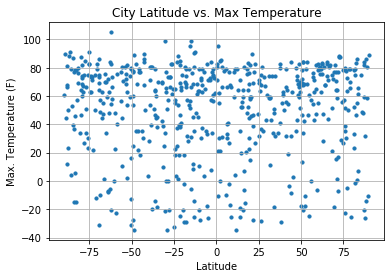

In [78]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/06-Python-APIs/Output_Plot/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

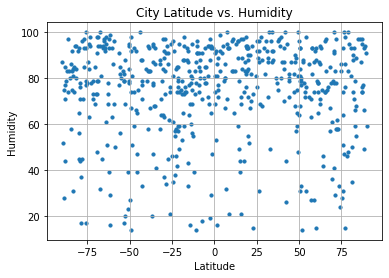

In [79]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/06-Python-APIs/Output_Plot/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

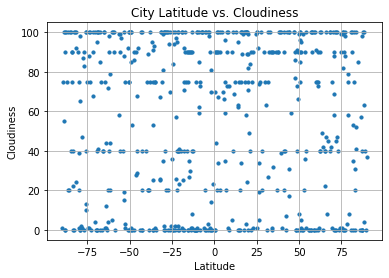

In [80]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/06-Python-APIs/Output_Plot/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

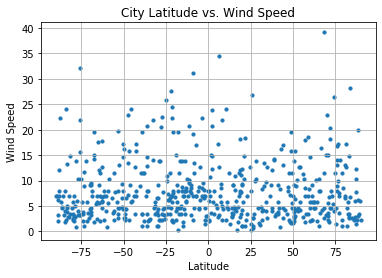

In [81]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/06-Python-APIs/Output_Plot/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression